In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('../src'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import numpy as np
import os
from matplotlib import pyplot as plt

from utils.data import subsampling
from utils.file import load_from_json

import time
from utils.model import load_lenet
from utils.metrics import error_rate
from attacks.attack import generate

Using TensorFlow backend.
C:\Users\hezek\.conda\envs\athena\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\hezek\.conda\envs\athena\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\hezek\.conda\envs\athena\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\hezek\.conda\envs\athena\lib\site-packages\t

## Results from Evaluation of AEs Using 20 WDs

In [2]:
task2_eval_20wAVEP = {'UM': [0.01314459049544995, 0.030333670374115267, 0.07381193124368049, 0.21638018200202225, 0.4408493427704752, 0.8119312436804853, 0.006066734074823054, 0.021233569261880688, 0.056622851365015166, 0.18099089989888775, 0.40141557128412536, 0.7785642062689585, 0.0010111223458038423, 0.00910010111223458, 0.020222446916076844, 0.033367037411526794, 0.047522750252780584, 0.11830131445904954, 0.003033367037411527, 0.017189079878665317, 0.024266936299292215, 0.042467138523761376, 0.07987866531850354, 0.20525783619817997], 'Ensemble': [0.00910010111223458, 0.023255813953488372, 0.032355915065722954, 0.0859453993933266, 0.22649140546006066, 0.6461071789686552, 0.008088978766430738, 0.012133468149646108, 0.020222446916076844, 0.06167846309403438, 0.15470171890798787, 0.5530839231547017, 0.006066734074823054, 0.011122345803842264, 0.015166835187057633, 0.021233569261880688, 0.029322548028311426, 0.08493427704752275, 0.007077856420626896, 0.015166835187057633, 0.017189079878665317, 0.027300303336703743, 0.04954499494438827, 0.16076845298281092], 'PGD-ADT': [0.00910010111223458, 0.016177957532861477, 0.027300303336703743, 0.03842264914054601, 0.07684529828109202, 0.42972699696663297, 0.00910010111223458, 0.011122345803842264, 0.015166835187057633, 0.022244691607684528, 0.0525783619817998, 0.3488372093023256, 0.008088978766430738, 0.012133468149646108, 0.011122345803842264, 0.01314459049544995, 0.01820020222446916, 0.032355915065722954, 0.00910010111223458, 0.010111223458038422, 0.00910010111223458, 0.01314459049544995, 0.020222446916076844, 0.05358948432760364]}

task1_eval_20wAVEP = {'UM': [0.16683518705763398, 0.5005055611729019, 0.717896865520728, 0.8291203235591507, 0.8796764408493428, 0.9069767441860465, 0.3862487360970677, 0.9474216380182002, 0.9858442871587462, 0.9888776541961577, 0.9888776541961577, 0.9888776541961577, 0.9474216380182002, 0.9858442871587462, 0.9888776541961577, 0.9888776541961577, 0.9888776541961577, 0.9888776541961577, 0.9059656218402427, 0.9817997977755308, 0.9888776541961577, 0.9888776541961577, 0.9888776541961577, 0.6703741152679474, 0.9888776541961577, 0.9888776541961577, 0.9888776541961577, 0.9888776541961577, 0.9888776541961577, 0.6804853387259858, 0.9888776541961577, 0.9888776541961577, 0.9888776541961577, 0.9888776541961577, 0.9888776541961577], 'Ensemble': [0.010111223458038422, 0.023255813953488372, 0.054600606673407485, 0.1365015166835187, 0.3437815975733064, 0.7553083923154702, 0.011122345803842264, 0.028311425682507583, 0.046511627906976744, 0.07280080889787664, 0.14964610717896865, 0.3356926188068756, 0.028311425682507583, 0.046511627906976744, 0.14762386248736098, 0.30434782608695654, 0.4115267947421638, 0.44792719919110213, 0.024266936299292215, 0.05358948432760364, 0.14762386248736098, 0.24570273003033366, 0.3114256825075834, 0.012133468149646108, 0.03842264914054601, 0.0910010111223458, 0.19919110212335692, 0.40546006066734075, 0.698685540950455, 0.012133468149646108, 0.03943377148634985, 0.09302325581395349, 0.21334681496461072, 0.4196157735085945, 0.7027300303336703], 'PGD-ADT': [0.015166835187057633, 0.03741152679474216, 0.05358948432760364, 0.10616784630940344, 0.19716885743174925, 0.6703741152679474, 0.015166835187057633, 0.03640040444893832, 0.055611729019211326, 0.10414560161779575, 0.15874620829120323, 0.39838220424671383, 0.03640040444893832, 0.055611729019211326, 0.15874620829120323, 0.27401415571284127, 0.29625884732052576, 0.2770475227502528, 0.03741152679474216, 0.05864509605662285, 0.15874620829120323, 0.2659251769464105, 0.301314459049545, 0.016177957532861477, 0.044489383215369056, 0.07987866531850354, 0.16582406471183014, 0.3640040444893832, 0.80788675429727, 0.016177957532861477, 0.046511627906976744, 0.07785642062689585, 0.17290192113245703, 0.3710819009100101, 0.8220424671385238]}

baseline_aes_eval_20wAVEP = {'UM': [0.8998988877654196, 0.8918099089989889, 0.8938321536905965, 0.884732052578362, 0.884732052578362, 0.8827098078867543, 0.8867542972699697, 0.8877654196157735, 0.8857431749241659, 0.8837209302325582, 0.8877654196157735, 0.8948432760364005, 0.8948432760364005, 0.8928210313447927, 0.8827098078867543, 0.8837209302325582, 0.8806875631951466, 0.8816986855409504, 0.8857431749241659, 0.8867542972699697, 0.8988877654196158, 0.9049544994944388, 0.9009100101112234, 0.9069767441860465, 0.9069767441860465, 0.897876643073812, 0.8918099089989889, 0.8877654196157735, 0.9059656218402427, 0.8928210313447927, 0.8968655207280081, 0.8958543983822043, 0.8867542972699697, 0.8958543983822043, 0.8928210313447927, 0.8958543983822043, 0.8918099089989889, 0.8968655207280081, 0.8968655207280081, 0.884732052578362, 0.8948432760364005, 0.8958543983822043, 0.9049544994944388, 0.8938321536905965, 0.8948432760364005], 'Ensemble': [0.9059656218402427, 0.9059656218402427, 0.9069767441860465, 0.9059656218402427, 0.890798786653185, 0.9069767441860465, 0.9069767441860465, 0.9059656218402427, 0.9059656218402427, 0.9049544994944388, 0.9049544994944388, 0.9059656218402427, 0.9039433771486349, 0.9049544994944388, 0.9049544994944388, 0.9049544994944388, 0.9059656218402427, 0.9049544994944388, 0.9059656218402427, 0.9059656218402427, 0.9059656218402427, 0.9029322548028311, 0.897876643073812, 0.9019211324570273, 0.9049544994944388, 0.9049544994944388, 0.9059656218402427, 0.9049544994944388, 0.9059656218402427, 0.9059656218402427, 0.9069767441860465, 0.9039433771486349, 0.9049544994944388, 0.9069767441860465, 0.9049544994944388, 0.9059656218402427, 0.9069767441860465, 0.9059656218402427, 0.9059656218402427, 0.9039433771486349, 0.9069767441860465, 0.9039433771486349, 0.9009100101112234, 0.9059656218402427, 0.9029322548028311], 'PGD-ADT': [0.9019211324570273, 0.9049544994944388, 0.9039433771486349, 0.9009100101112234, 0.8928210313447927, 0.9019211324570273, 0.9019211324570273, 0.9039433771486349, 0.9039433771486349, 0.9039433771486349, 0.9019211324570273, 0.9029322548028311, 0.9029322548028311, 0.9029322548028311, 0.9039433771486349, 0.9029322548028311, 0.9029322548028311, 0.9019211324570273, 0.9019211324570273, 0.9029322548028311, 0.9009100101112234, 0.9019211324570273, 0.8958543983822043, 0.897876643073812, 0.8998988877654196, 0.9049544994944388, 0.9029322548028311, 0.9039433771486349, 0.9029322548028311, 0.9039433771486349, 0.9019211324570273, 0.9019211324570273, 0.9029322548028311, 0.9029322548028311, 0.9039433771486349, 0.9019211324570273, 0.9019211324570273, 0.9019211324570273, 0.9019211324570273, 0.9029322548028311, 0.9079878665318504, 0.9009100101112234, 0.8998988877654196, 0.9039433771486349, 0.9079878665318504]}

task2_eval_20wMV = {'UM': [0.01314459049544995, 0.030333670374115267, 0.07381193124368049, 0.21638018200202225, 0.4408493427704752, 0.8119312436804853, 0.006066734074823054, 0.021233569261880688, 0.056622851365015166, 0.18099089989888775, 0.40141557128412536, 0.7785642062689585, 0.0010111223458038423, 0.00910010111223458, 0.020222446916076844, 0.033367037411526794, 0.047522750252780584, 0.11830131445904954, 0.003033367037411527, 0.017189079878665317, 0.024266936299292215, 0.042467138523761376, 0.07987866531850354, 0.20525783619817997], 'Ensemble': [0.010111223458038422, 0.022244691607684528, 0.032355915065722954, 0.0839231547017189, 0.22143579373104147, 0.6491405460060667, 0.00910010111223458, 0.01314459049544995, 0.020222446916076844, 0.06167846309403438, 0.15166835187057634, 0.5510616784630941, 0.006066734074823054, 0.010111223458038422, 0.015166835187057633, 0.020222446916076844, 0.030333670374115267, 0.08291203235591507, 0.007077856420626896, 0.015166835187057633, 0.017189079878665317, 0.028311425682507583, 0.04853387259858443, 0.16076845298281092], 'PGD-ADT': [0.00910010111223458, 0.016177957532861477, 0.027300303336703743, 0.03842264914054601, 0.07684529828109202, 0.42972699696663297, 0.00910010111223458, 0.011122345803842264, 0.015166835187057633, 0.022244691607684528, 0.0525783619817998, 0.3488372093023256, 0.008088978766430738, 0.012133468149646108, 0.011122345803842264, 0.01314459049544995, 0.01820020222446916, 0.032355915065722954, 0.00910010111223458, 0.010111223458038422, 0.00910010111223458, 0.01314459049544995, 0.020222446916076844, 0.05358948432760364]}

task1_eval_20wMV = {'UM': [0.16683518705763398, 0.5005055611729019, 0.717896865520728, 0.8291203235591507, 0.8796764408493428, 0.9069767441860465, 0.3862487360970677, 0.9474216380182002, 0.9858442871587462, 0.9888776541961577, 0.9888776541961577, 0.9888776541961577, 0.9474216380182002, 0.9858442871587462, 0.9888776541961577, 0.9888776541961577, 0.9888776541961577, 0.9888776541961577, 0.9059656218402427, 0.9817997977755308, 0.9888776541961577, 0.9888776541961577, 0.9888776541961577, 0.6703741152679474, 0.9888776541961577, 0.9888776541961577, 0.9888776541961577, 0.9888776541961577, 0.9888776541961577, 0.6804853387259858, 0.9888776541961577, 0.9888776541961577, 0.9888776541961577, 0.9888776541961577, 0.9888776541961577], 'Ensemble': [0.010111223458038422, 0.024266936299292215, 0.05358948432760364, 0.13144590495449948, 0.34074823053589487, 0.7573306370070778, 0.011122345803842264, 0.028311425682507583, 0.047522750252780584, 0.07785642062689585, 0.14964610717896865, 0.3346814964610718, 0.029322548028311426, 0.046511627906976744, 0.14560161779575329, 0.30940343781597573, 0.41354903943377147, 0.448938321536906, 0.024266936299292215, 0.05358948432760364, 0.14762386248736098, 0.243680485338726, 0.30940343781597573, 0.012133468149646108, 0.03943377148634985, 0.09302325581395349, 0.20222446916076844, 0.4044489383215369, 0.6996966632962589, 0.01314459049544995, 0.04044489383215369, 0.09504550050556117, 0.21638018200202225, 0.42163801820020225, 0.7067745197168858], 'PGD-ADT': [0.015166835187057633, 0.03741152679474216, 0.05358948432760364, 0.10616784630940344, 0.19716885743174925, 0.6703741152679474, 0.015166835187057633, 0.03640040444893832, 0.055611729019211326, 0.10414560161779575, 0.15874620829120323, 0.39838220424671383, 0.03640040444893832, 0.055611729019211326, 0.15874620829120323, 0.27401415571284127, 0.29625884732052576, 0.2770475227502528, 0.03741152679474216, 0.05864509605662285, 0.15874620829120323, 0.2659251769464105, 0.301314459049545, 0.016177957532861477, 0.044489383215369056, 0.07987866531850354, 0.16582406471183014, 0.3640040444893832, 0.80788675429727, 0.016177957532861477, 0.046511627906976744, 0.07785642062689585, 0.17290192113245703, 0.3710819009100101, 0.8220424671385238]}

baseline_aes_eval_20wMV = {'UM': [0.8998988877654196, 0.8918099089989889, 0.8938321536905965, 0.884732052578362, 0.884732052578362, 0.8827098078867543, 0.8867542972699697, 0.8877654196157735, 0.8857431749241659, 0.8837209302325582, 0.8877654196157735, 0.8948432760364005, 0.8948432760364005, 0.8928210313447927, 0.8827098078867543, 0.8837209302325582, 0.8806875631951466, 0.8816986855409504, 0.8857431749241659, 0.8867542972699697, 0.8988877654196158, 0.9049544994944388, 0.9009100101112234, 0.9069767441860465, 0.9069767441860465, 0.897876643073812, 0.8918099089989889, 0.8877654196157735, 0.9059656218402427, 0.8928210313447927, 0.8968655207280081, 0.8958543983822043, 0.8867542972699697, 0.8958543983822043, 0.8928210313447927, 0.8958543983822043, 0.8918099089989889, 0.8968655207280081, 0.8968655207280081, 0.884732052578362, 0.8948432760364005, 0.8958543983822043, 0.9049544994944388, 0.8938321536905965, 0.8948432760364005], 'Ensemble': [0.9059656218402427, 0.9059656218402427, 0.9069767441860465, 0.9079878665318504, 0.8938321536905965, 0.9069767441860465, 0.9069767441860465, 0.9059656218402427, 0.9059656218402427, 0.9049544994944388, 0.9049544994944388, 0.9059656218402427, 0.9039433771486349, 0.9049544994944388, 0.9059656218402427, 0.9049544994944388, 0.9059656218402427, 0.9059656218402427, 0.9059656218402427, 0.9059656218402427, 0.9059656218402427, 0.9019211324570273, 0.8958543983822043, 0.8998988877654196, 0.9049544994944388, 0.9049544994944388, 0.9059656218402427, 0.9049544994944388, 0.9059656218402427, 0.9059656218402427, 0.9069767441860465, 0.9049544994944388, 0.9049544994944388, 0.9059656218402427, 0.9059656218402427, 0.9059656218402427, 0.9059656218402427, 0.9049544994944388, 0.9049544994944388, 0.9039433771486349, 0.9069767441860465, 0.9039433771486349, 0.9009100101112234, 0.9049544994944388, 0.9039433771486349], 'PGD-ADT': [0.9019211324570273, 0.9049544994944388, 0.9039433771486349, 0.9009100101112234, 0.8928210313447927, 0.9019211324570273, 0.9019211324570273, 0.9039433771486349, 0.9039433771486349, 0.9039433771486349, 0.9019211324570273, 0.9029322548028311, 0.9029322548028311, 0.9029322548028311, 0.9039433771486349, 0.9029322548028311, 0.9029322548028311, 0.9019211324570273, 0.9019211324570273, 0.9029322548028311, 0.9009100101112234, 0.9019211324570273, 0.8958543983822043, 0.897876643073812, 0.8998988877654196, 0.9049544994944388, 0.9029322548028311, 0.9039433771486349, 0.9029322548028311, 0.9039433771486349, 0.9019211324570273, 0.9019211324570273, 0.9029322548028311, 0.9029322548028311, 0.9039433771486349, 0.9019211324570273, 0.9019211324570273, 0.9019211324570273, 0.9019211324570273, 0.9029322548028311, 0.9079878665318504, 0.9009100101112234, 0.8998988877654196, 0.9039433771486349, 0.9079878665318504]}

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


FGSM_Task2_rot_20AVEP = {}
FGSM_Task2_tran_20AVEP = {}
PGD_Task2_Tran_50_20AVEP = {}
PGD_Task2_Tran_100_20AVEP = {}

FGSM_Task1_20AVEP = {}
PGD_Task1_20AVEP = {}

FGSM_baseline_20AVEP = {}
PGD_baseline_20AVEP = {}

FGSM_Task2_rot_20MV = {}
FGSM_Task2_tran_20MV = {}
PGD_Task2_Tran_50_20MV = {}
PGD_Task2_Tran_100_20MV = {}

FGSM_Task1_20MV = {}
PGD_Task1_20MV = {}

FGSM_baseline_20MV = {}
PGD_baseline_20MV = {}


In [4]:
# FGSM-white-box with Rotation
FGSM_Task2_rot_20AVEP['UM'] = task2_eval_20wAVEP['UM'][:6]
FGSM_Task2_rot_20AVEP['Ensemble'] = task2_eval_20wAVEP['Ensemble'][:6]
FGSM_Task2_rot_20AVEP['PGD-ADT'] = task2_eval_20wAVEP['PGD-ADT'][:6]
print("FGSM_Task2_rot_20AVEP_UM= ", FGSM_Task2_rot_20AVEP['UM'])
print("FGSM_Task2_rot_20AVEP_EN= ",FGSM_Task2_rot_20AVEP['Ensemble'])
print("FGSM_Task2_rot_20AVEP_ADT= ",FGSM_Task2_rot_20AVEP['PGD-ADT'])

# FGSM-white-box with Translation
FGSM_Task2_tran_20AVEP['UM'] = task2_eval_20wAVEP['UM'][6:12]
FGSM_Task2_tran_20AVEP['Ensemble'] = task2_eval_20wAVEP['Ensemble'][6:12]
FGSM_Task2_tran_20AVEP['PGD-ADT'] = task2_eval_20wAVEP['PGD-ADT'][6:12]
print("FGSM_Task2_tran_20AVEP_UM= ",FGSM_Task2_tran_20AVEP['UM'])
print("FGSM_Task2_tran_20AVEP_EN= ",FGSM_Task2_tran_20AVEP['Ensemble'])
print("FGSM_Task2_tran_20AVEP_ADT= ",FGSM_Task2_tran_20AVEP['PGD-ADT'])

# PGD-white-box with Translation at 50 Number of Samples
PGD_Task2_Tran_50_20AVEP['UM'] = task2_eval_20wAVEP['UM'][12:18]
PGD_Task2_Tran_50_20AVEP['Ensemble'] = task2_eval_20wAVEP['Ensemble'][12:18]
PGD_Task2_Tran_50_20AVEP['PGD-ADT'] = task2_eval_20wAVEP['PGD-ADT'][12:18]
print("PGD_Task2_Tran_50_20AVEP_UM= ", PGD_Task2_Tran_50_20AVEP['UM'])
print("PGD_Task2_Tran_50_20AVEP_EN= ",PGD_Task2_Tran_50_20AVEP['Ensemble'])
print("PGD_Task2_Tran_50_20AVEP_ADT= ",PGD_Task2_Tran_50_20AVEP['PGD-ADT'])

# PGD-white-box with Translation at 100 Number of Samples
PGD_Task2_Tran_100_20AVEP['UM'] = task2_eval_20wAVEP['UM'][18:]
PGD_Task2_Tran_100_20AVEP['Ensemble'] = task2_eval_20wAVEP['Ensemble'][18:]
PGD_Task2_Tran_100_20AVEP['PGD-ADT'] = task2_eval_20wAVEP['PGD-ADT'][18:]
print("PGD_Task2_Tran_100_20AVEP_UM= ", PGD_Task2_Tran_100_20AVEP['UM'])
print("PGD_Task2_Tran_100_20AVEP_EN= ",PGD_Task2_Tran_100_20AVEP['Ensemble'])
print("PGD_Task2_Tran_100_20AVEP_ADT= ",PGD_Task2_Tran_100_20AVEP['PGD-ADT'])

# FGSM-Zero-Knowledge 
FGSM_Task1_20AVEP['UM'] = task1_eval_20wAVEP['UM'][:6]
FGSM_Task1_20AVEP['Ensemble'] = task1_eval_20wAVEP['Ensemble'][:6]
FGSM_Task1_20AVEP['PGD-ADT'] = task1_eval_20wAVEP['PGD-ADT'][:6]
print("FGSM_Task1_20AVEP_UM= ", FGSM_Task1_20AVEP['UM'])
print("FGSM_Task1_20AVEP_EN= ", FGSM_Task1_20AVEP['Ensemble'])
print("FGSM_Task1_20AVEP_ADT= ", FGSM_Task1_20AVEP['PGD-ADT'])

# PGD-Zero-Knowledge 
PGD_Task1_20AVEP['UM'] = task1_eval_20wAVEP['UM'][6:12]
PGD_Task1_20AVEP['Ensemble'] = task1_eval_20wAVEP['Ensemble'][6:12]
PGD_Task1_20AVEP['PGD-ADT'] = task1_eval_20wAVEP['PGD-ADT'][6:12]
print("PGD_Task1_20AVEP_UM= ", PGD_Task1_20AVEP['UM'])
print("PGD_Task1_20AVEP_EN= ",PGD_Task1_20AVEP['Ensemble'])
print("PGD_Task1_20AVEP_ADT= ",PGD_Task1_20AVEP['PGD-ADT'])

# FGSM-baseline AEs 
FGSM_baseline_20AVEP['UM'] = baseline_aes_eval_20wAVEP['UM'][:5]
FGSM_baseline_20AVEP['Ensemble'] = baseline_aes_eval_20wAVEP['Ensemble'][:5]
FGSM_baseline_20AVEP['PGD-ADT'] = baseline_aes_eval_20wAVEP['PGD-ADT'][:5]
print("FGSM_baseline_20AVEP_UM= ", FGSM_baseline_20AVEP['UM'])
print("FGSM_baseline_20AVEP_EN= ",FGSM_baseline_20AVEP['Ensemble'])
print("FGSM_baseline_20AVEP_ADT= ",FGSM_baseline_20AVEP['PGD-ADT'])

# PGD-Baseline AEs 
PGD_baseline_20AVEP['UM'] = baseline_aes_eval_20wAVEP['UM'][30:35]
PGD_baseline_20AVEP['Ensemble'] = baseline_aes_eval_20wAVEP['Ensemble'][30:35]
PGD_baseline_20AVEP['PGD-ADT'] = baseline_aes_eval_20wAVEP['PGD-ADT'][30:35]
print("PGD_baseline_20AVEP_UM= ", PGD_baseline_20AVEP['UM'])
print("PGD_baseline_20AVEP_EN= ",PGD_baseline_20AVEP['Ensemble'])
print("PGD_baseline_20AVEP_ADT= ",PGD_baseline_20AVEP['PGD-ADT'])

FGSM_Task2_rot_20AVEP_UM=  [0.01314459049544995, 0.030333670374115267, 0.07381193124368049, 0.21638018200202225, 0.4408493427704752, 0.8119312436804853]
FGSM_Task2_rot_20AVEP_EN=  [0.00910010111223458, 0.023255813953488372, 0.032355915065722954, 0.0859453993933266, 0.22649140546006066, 0.6461071789686552]
FGSM_Task2_rot_20AVEP_ADT=  [0.00910010111223458, 0.016177957532861477, 0.027300303336703743, 0.03842264914054601, 0.07684529828109202, 0.42972699696663297]
FGSM_Task2_tran_20AVEP_UM=  [0.006066734074823054, 0.021233569261880688, 0.056622851365015166, 0.18099089989888775, 0.40141557128412536, 0.7785642062689585]
FGSM_Task2_tran_20AVEP_EN=  [0.008088978766430738, 0.012133468149646108, 0.020222446916076844, 0.06167846309403438, 0.15470171890798787, 0.5530839231547017]
FGSM_Task2_tran_20AVEP_ADT=  [0.00910010111223458, 0.011122345803842264, 0.015166835187057633, 0.022244691607684528, 0.0525783619817998, 0.3488372093023256]
PGD_Task2_Tran_50_20AVEP_UM=  [0.0010111223458038423, 0.009100101

##  Plots of AVEP Strategy with 20 WDs

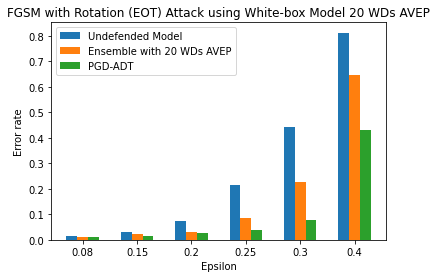

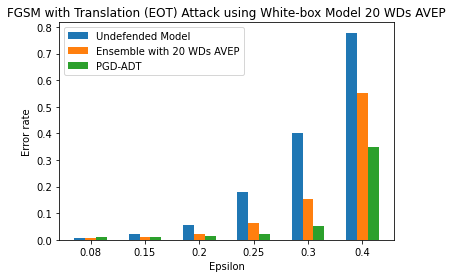

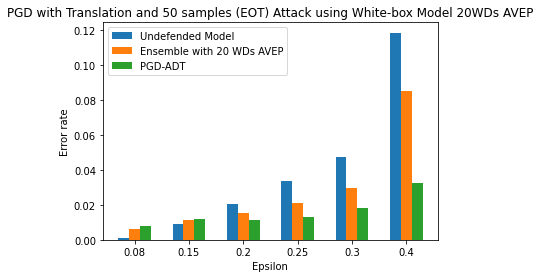

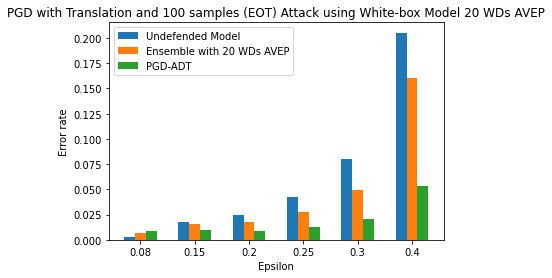

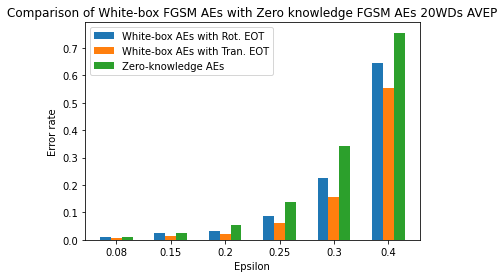

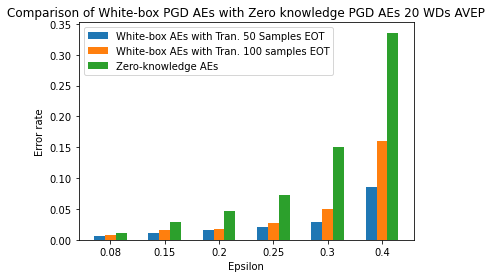

C:\Users\hezek\.conda\envs\athena\lib\site-packages\ipykernel_launcher.py:123: UserWarning: FixedFormatter should only be used together with FixedLocator


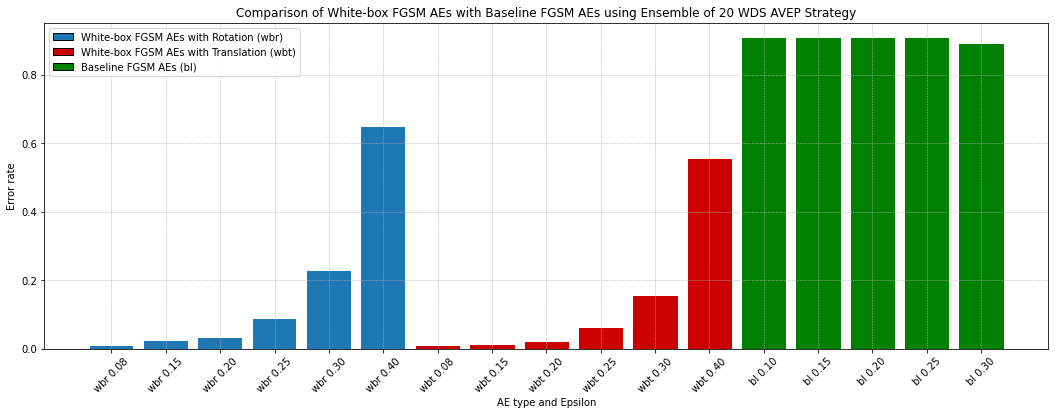

C:\Users\hezek\.conda\envs\athena\lib\site-packages\ipykernel_launcher.py:157: UserWarning: FixedFormatter should only be used together with FixedLocator


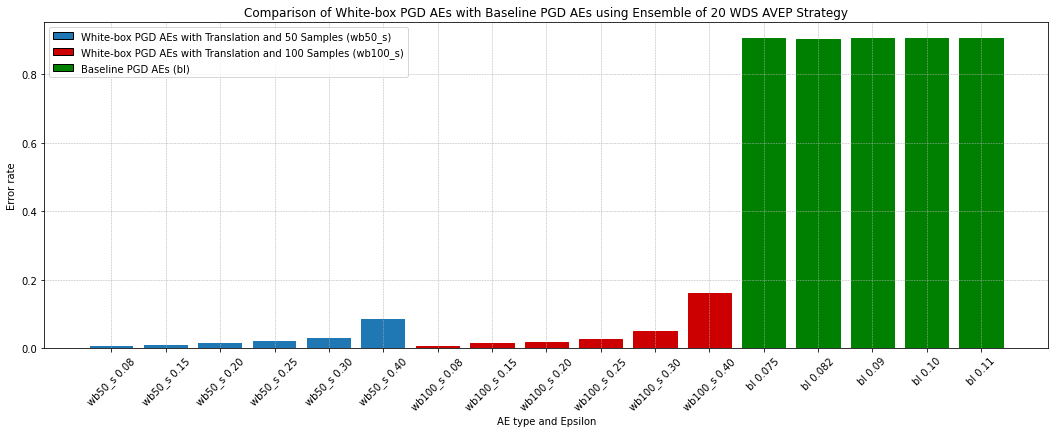

In [5]:
from matplotlib.patches import Patch
w = 0.2
x = [0.08, 0.15, 0.20, 0.25, 0.30, 0.40] #epsilon values for attack

# FGSM-White-box Attack with Rotation Setting in EOT
bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]
bar3 = [i+2*w for i in bar1]
plt.bar(bar1, FGSM_Task2_rot_20AVEP['UM'], w , label='Undefended Model')
plt.bar(bar2, FGSM_Task2_rot_20AVEP['Ensemble'], w , label='Ensemble with 20 WDs AVEP')
plt.bar(bar3, FGSM_Task2_rot_20AVEP['PGD-ADT'], w , label='PGD-ADT')

plt.xlabel('Epsilon')
plt.ylabel('Error rate')
plt.title('FGSM with Rotation (EOT) Attack using White-box Model 20 WDs AVEP')
plt.xticks(bar1+w, x)
plt.legend()
plt.show()

# FGSM-White-box Attack with Translation setting in EOT
bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]
bar3 = [i+2*w for i in bar1]
plt.bar(bar1, FGSM_Task2_tran_20AVEP['UM'], w , label='Undefended Model')
plt.bar(bar2, FGSM_Task2_tran_20AVEP['Ensemble'], w , label='Ensemble with 20 WDs AVEP')
plt.bar(bar3, FGSM_Task2_tran_20AVEP['PGD-ADT'], w , label='PGD-ADT')

plt.xlabel('Epsilon')
plt.ylabel('Error rate')
plt.title('FGSM with Translation (EOT) Attack using White-box Model 20 WDs AVEP')
plt.xticks(bar1+w, x)
plt.legend()
plt.show()

# PGD-White-box Attack with Translation and 50 num of samples setting in EOT
bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]
bar3 = [i+2*w for i in bar1]
plt.bar(bar1, PGD_Task2_Tran_50_20AVEP['UM'], w , label='Undefended Model')
plt.bar(bar2, PGD_Task2_Tran_50_20AVEP['Ensemble'], w , label='Ensemble with 20 WDs AVEP')
plt.bar(bar3, PGD_Task2_Tran_50_20AVEP['PGD-ADT'], w , label='PGD-ADT')

plt.xlabel('Epsilon')
plt.ylabel('Error rate')
plt.title('PGD with Translation and 50 samples (EOT) Attack using White-box Model 20WDs AVEP')
plt.xticks(bar1+w, x)
plt.legend()
plt.show()

# PGD-White-box Attack with Translation and 100 num of samples setting in EOT
bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]
bar3 = [i+2*w for i in bar1]
plt.bar(bar1, PGD_Task2_Tran_100_20AVEP['UM'], w , label='Undefended Model')
plt.bar(bar2, PGD_Task2_Tran_100_20AVEP['Ensemble'], w , label='Ensemble with 20 WDs AVEP')
plt.bar(bar3, PGD_Task2_Tran_100_20AVEP['PGD-ADT'], w , label='PGD-ADT')

plt.xlabel('Epsilon')
plt.ylabel('Error rate')
plt.title('PGD with Translation and 100 samples (EOT) Attack using White-box Model 20 WDs AVEP')
plt.xticks(bar1+w, x)
plt.legend()
plt.show()

# FGSM-Comparison of White-box AEs with Zero-Knowledge AEs
bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]
bar3 = [i+2*w for i in bar1]
plt.bar(bar1, FGSM_Task2_rot_20AVEP['Ensemble'], w , label='White-box AEs with Rot. EOT')
plt.bar(bar2, FGSM_Task2_tran_20AVEP['Ensemble'], w , label='White-box AEs with Tran. EOT')
plt.bar(bar3, FGSM_Task1_20AVEP['Ensemble'], w , label='Zero-knowledge AEs')

plt.xlabel('Epsilon')
plt.ylabel('Error rate')
plt.title('Comparison of White-box FGSM AEs with Zero knowledge FGSM AEs 20WDs AVEP')
plt.xticks(bar1+w, x)
plt.legend()
plt.show()

# PGD-Comparison of White-box AEs with Zero-Knowledge AEs
bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]
bar3 = [i+2*w for i in bar1]
plt.bar(bar1, PGD_Task2_Tran_50_20AVEP['Ensemble'], w , label='White-box AEs with Tran. 50 Samples EOT')
plt.bar(bar2, PGD_Task2_Tran_100_20AVEP['Ensemble'], w , label='White-box AEs with Tran. 100 samples EOT')
plt.bar(bar3, PGD_Task1_20AVEP['Ensemble'], w , label='Zero-knowledge AEs')

plt.xlabel('Epsilon')
plt.ylabel('Error rate')
plt.title('Comparison of White-box PGD AEs with Zero knowledge PGD AEs 20 WDs AVEP')
plt.xticks(bar1+w, x)
plt.legend()
plt.show()

# w = 0.6
x_eps = ['wbr 0.08', 'wbr 0.15', 'wbr 0.20', 'wbr 0.25', 'wbr 0.30', 'wbr 0.40','wbt 0.08', 'wbt 0.15', 'wbt 0.20', 'wbt 0.25', 'wbt 0.30', 'wbt 0.40', 'bl 0.10', 'bl 0.15', 'bl 0.20', 'bl 0.25', 'bl 0.30']
new_data = {'Epsilon': x_eps, 'Error rate': FGSM_Task2_rot_20AVEP['Ensemble']+FGSM_Task2_tran_20AVEP['Ensemble']+FGSM_baseline_20AVEP['Ensemble']}

df = pd.DataFrame.from_dict(new_data)

legend_elements = [Patch(edgecolor='black',
                         label='White-box FGSM AEs with Rotation (wbr)'),Patch(facecolor='#CC0000',edgecolor='black',
                         label='White-box FGSM AEs with Translation (wbt)'), Patch(facecolor='green', edgecolor='black',
                         label='Baseline FGSM AEs (bl)')]

fig = plt.figure(figsize = (18, 6))
ax1 = plt.subplot(111)
ret = ax1.bar(df['Epsilon'], df['Error rate'])
ret[6].set_color('#CC0000')
ret[7].set_color('#CC0000')
ret[8].set_color('#CC0000')
ret[9].set_color('#CC0000')
ret[10].set_color('#CC0000')
ret[11].set_color('#CC0000')
ret[12].set_color('green')
ret[13].set_color('green')
ret[14].set_color('green')
ret[15].set_color('green')
ret[16].set_color('green')
ax1.xaxis.grid(linestyle= '--', linewidth=0.5)
ax1.yaxis.grid(linestyle= '--', linewidth=0.5)
ax1.legend(handles=legend_elements)
ax1.set_xticklabels(x_eps, rotation = 45)
ax1.set_xlabel('AE type and Epsilon')
ax1.set_ylabel('Error rate')
ax1.set_title('Comparison of White-box FGSM AEs with Baseline FGSM AEs using Ensemble of 20 WDS AVEP Strategy')
plt.show()

# PGD-Comparison of White-box AEs with Baseline AEs
x_eps = ['wb50_s 0.08', 'wb50_s 0.15', 'wb50_s 0.20', 'wb50_s 0.25', 'wb50_s 0.30', 'wb50_s 0.40','wb100_s 0.08', 'wb100_s 0.15', 'wb100_s 0.20', 'wb100_s 0.25', 'wb100_s 0.30', 'wb100_s 0.40', 'bl 0.075', 'bl 0.082', 'bl 0.09', 'bl 0.10', 'bl 0.11']
new_data = {'Epsilon': x_eps, 'Error rate': PGD_Task2_Tran_50_20AVEP['Ensemble']+PGD_Task2_Tran_100_20AVEP['Ensemble']+PGD_baseline_20AVEP['Ensemble']}

df = pd.DataFrame.from_dict(new_data)

legend_elements = [Patch(edgecolor='black',
                         label='White-box PGD AEs with Translation and 50 Samples (wb50_s)'),Patch(facecolor='#CC0000',edgecolor='black',
                         label='White-box PGD AEs with Translation and 100 Samples (wb100_s)'), Patch(facecolor='green', edgecolor='black',
                         label='Baseline PGD AEs (bl)')]

fig = plt.figure(figsize = (18, 6))
ax1 = plt.subplot(111)
ret = ax1.bar(df['Epsilon'], df['Error rate'])
ret[6].set_color('#CC0000')
ret[7].set_color('#CC0000')
ret[8].set_color('#CC0000')
ret[9].set_color('#CC0000')
ret[10].set_color('#CC0000')
ret[11].set_color('#CC0000')
ret[12].set_color('green')
ret[13].set_color('green')
ret[14].set_color('green')
ret[15].set_color('green')
ret[16].set_color('green')
ax1.xaxis.grid(linestyle= '--', linewidth=0.5)
ax1.yaxis.grid(linestyle= '--', linewidth=0.5)
ax1.legend(handles=legend_elements)
ax1.set_xticklabels(x_eps, rotation = 45)
ax1.set_xlabel('AE type and Epsilon')
ax1.set_ylabel('Error rate')
ax1.set_title('Comparison of White-box PGD AEs with Baseline PGD AEs using Ensemble of 20 WDS AVEP Strategy')
plt.show()

## Evaluation using 20 WDs with MV Ensemble Strategy

In [6]:
# FGSM-white-box with Rotation
FGSM_Task2_rot_20MV['UM'] = task2_eval_20wMV['UM'][:6]
FGSM_Task2_rot_20MV['Ensemble'] = task2_eval_20wMV['Ensemble'][:6]
FGSM_Task2_rot_20MV['PGD-ADT'] = task2_eval_20wMV['PGD-ADT'][:6]
print("FGSM_Task2_rot_20MV['UM'] =", FGSM_Task2_rot_20MV['UM'])
print("FGSM_Task2_rot_20MV['EN'] =",FGSM_Task2_rot_20MV['Ensemble'])
print("FGSM_Task2_rot_20MV['ADT'] =",FGSM_Task2_rot_20MV['PGD-ADT'])

# FGSM-white-box with Translation
FGSM_Task2_tran_20MV['UM'] = task2_eval_20wMV['UM'][6:12]
FGSM_Task2_tran_20MV['Ensemble'] = task2_eval_20wMV['Ensemble'][6:12]
FGSM_Task2_tran_20MV['PGD-ADT'] = task2_eval_20wMV['PGD-ADT'][6:12]
print("FGSM_Task2_tran_20MV['UM'] =", FGSM_Task2_tran_20MV['UM'])
print("FGSM_Task2_tran_20MV['EN'] =",FGSM_Task2_tran_20MV['Ensemble'])
print("FGSM_Task2_tran_20MV['ADT'] =",FGSM_Task2_tran_20MV['PGD-ADT'])

# PGD-white-box with Translation at 50 Number of Samples
PGD_Task2_Tran_50_20MV['UM'] = task2_eval_20wMV['UM'][12:18]
PGD_Task2_Tran_50_20MV['Ensemble'] = task2_eval_20wMV['Ensemble'][12:18]
PGD_Task2_Tran_50_20MV['PGD-ADT'] = task2_eval_20wMV['PGD-ADT'][12:18]
print("PGD_Task2_Tran_50_20MV['UM'] =", PGD_Task2_Tran_50_20MV['UM'])
print("PGD_Task2_Tran_50_20MV['EN'] =",PGD_Task2_Tran_50_20MV['Ensemble'])
print("PGD_Task2_Tran_50_20MV['ADT'] =",PGD_Task2_Tran_50_20MV['PGD-ADT'])

# PGD-white-box with Translation at 100 Number of Samples
PGD_Task2_Tran_100_20MV['UM'] = task2_eval_20wMV['UM'][18:]
PGD_Task2_Tran_100_20MV['Ensemble'] = task2_eval_20wMV['Ensemble'][18:]
PGD_Task2_Tran_100_20MV['PGD-ADT'] = task2_eval_20wMV['PGD-ADT'][18:]
print("PGD_Task2_Tran_100_20MV['UM'] =", PGD_Task2_Tran_100_20MV['UM'])
print("PGD_Task2_Tran_100_20MV['EN'] =",PGD_Task2_Tran_100_20MV['Ensemble'])
print("PGD_Task2_Tran_100_20MV['ADT'] =",PGD_Task2_Tran_100_20MV['PGD-ADT'])

# FGSM-Zero-Knowledge 
FGSM_Task1_20MV['UM'] = task1_eval_20wMV['UM'][:6]
FGSM_Task1_20MV['Ensemble'] = task1_eval_20wMV['Ensemble'][:6]
FGSM_Task1_20MV['PGD-ADT'] = task1_eval_20wMV['PGD-ADT'][:6]
print("FGSM_Task1_20MV['UM'] =", FGSM_Task1_20MV['UM'])
print("FGSM_Task1_20MV['EN'] =",FGSM_Task1_20MV['Ensemble'])
print("FGSM_Task1_20MV['ADT'] =",FGSM_Task1_20MV['PGD-ADT'])

# PGD-Zero-Knowledge 
PGD_Task1_20MV['UM'] = task1_eval_20wMV['UM'][6:12]
PGD_Task1_20MV['Ensemble'] = task1_eval_20wMV['Ensemble'][6:12]
PGD_Task1_20MV['PGD-ADT'] = task1_eval_20wMV['PGD-ADT'][6:12]
print("PGD_Task1_20MV['UM'] =", PGD_Task1_20MV['UM'])
print("PGD_Task1_20MV['EN'] =",PGD_Task1_20MV['Ensemble'])
print("PGD_Task1_20MV['ADT'] =",PGD_Task1_20MV['PGD-ADT'])

# FGSM-baseline AEs 
FGSM_baseline_20MV['UM'] = baseline_aes_eval_20wMV['UM'][:5]
FGSM_baseline_20MV['Ensemble'] = baseline_aes_eval_20wMV['Ensemble'][:5]
FGSM_baseline_20MV['PGD-ADT'] = baseline_aes_eval_20wMV['PGD-ADT'][:5]
print("FGSM_baseline_20MV['UM'] =",FGSM_baseline_20MV['UM'])
print("FGSM_baseline_20MV['EN'] =",FGSM_baseline_20MV['Ensemble'])
print("FGSM_baseline_20MV['ADT'] =",FGSM_baseline_20MV['PGD-ADT'])

# PGD-Baseline AEs 
PGD_baseline_20MV['UM'] = baseline_aes_eval_20wMV['UM'][30:35]
PGD_baseline_20MV['Ensemble'] = baseline_aes_eval_20wMV['Ensemble'][30:35]
PGD_baseline_20MV['PGD-ADT'] = baseline_aes_eval_20wMV['PGD-ADT'][30:35]
print("PGD_baseline_20MV['UM'] =",PGD_baseline_20MV['UM'])
print("PGD_baseline_20MV['EN'] =",PGD_baseline_20MV['Ensemble'])
print("PGD_baseline_20MV['ADT'] =",PGD_baseline_20MV['PGD-ADT'])

FGSM_Task2_rot_20MV['UM'] = [0.01314459049544995, 0.030333670374115267, 0.07381193124368049, 0.21638018200202225, 0.4408493427704752, 0.8119312436804853]
FGSM_Task2_rot_20MV['EN'] = [0.010111223458038422, 0.022244691607684528, 0.032355915065722954, 0.0839231547017189, 0.22143579373104147, 0.6491405460060667]
FGSM_Task2_rot_20MV['ADT'] = [0.00910010111223458, 0.016177957532861477, 0.027300303336703743, 0.03842264914054601, 0.07684529828109202, 0.42972699696663297]
FGSM_Task2_tran_20MV['UM'] = [0.006066734074823054, 0.021233569261880688, 0.056622851365015166, 0.18099089989888775, 0.40141557128412536, 0.7785642062689585]
FGSM_Task2_tran_20MV['EN'] = [0.00910010111223458, 0.01314459049544995, 0.020222446916076844, 0.06167846309403438, 0.15166835187057634, 0.5510616784630941]
FGSM_Task2_tran_20MV['ADT'] = [0.00910010111223458, 0.011122345803842264, 0.015166835187057633, 0.022244691607684528, 0.0525783619817998, 0.3488372093023256]
PGD_Task2_Tran_50_20MV['UM'] = [0.0010111223458038423, 0.009

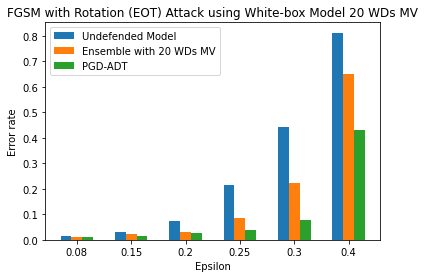

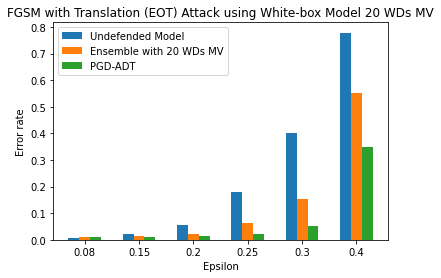

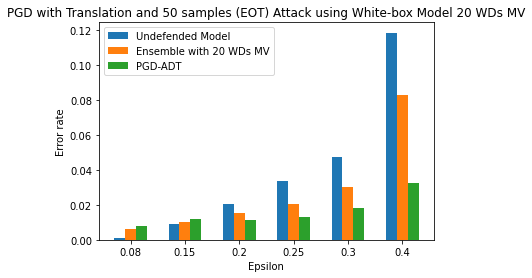

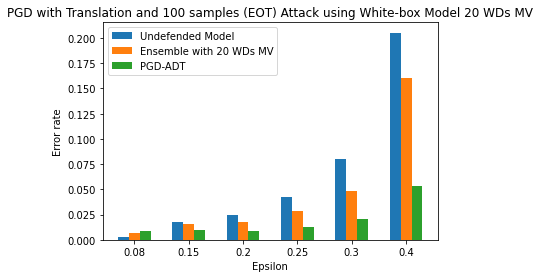

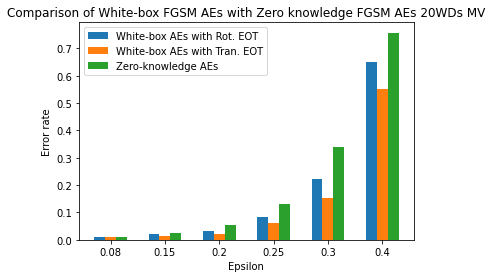

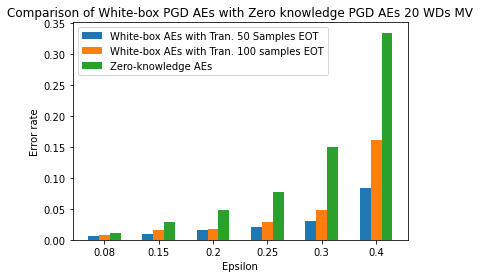

C:\Users\hezek\.conda\envs\athena\lib\site-packages\ipykernel_launcher.py:123: UserWarning: FixedFormatter should only be used together with FixedLocator


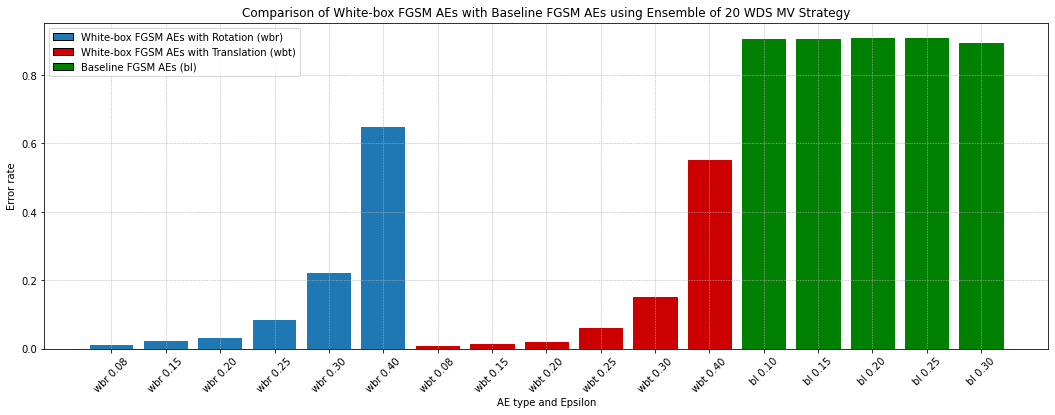

C:\Users\hezek\.conda\envs\athena\lib\site-packages\ipykernel_launcher.py:157: UserWarning: FixedFormatter should only be used together with FixedLocator


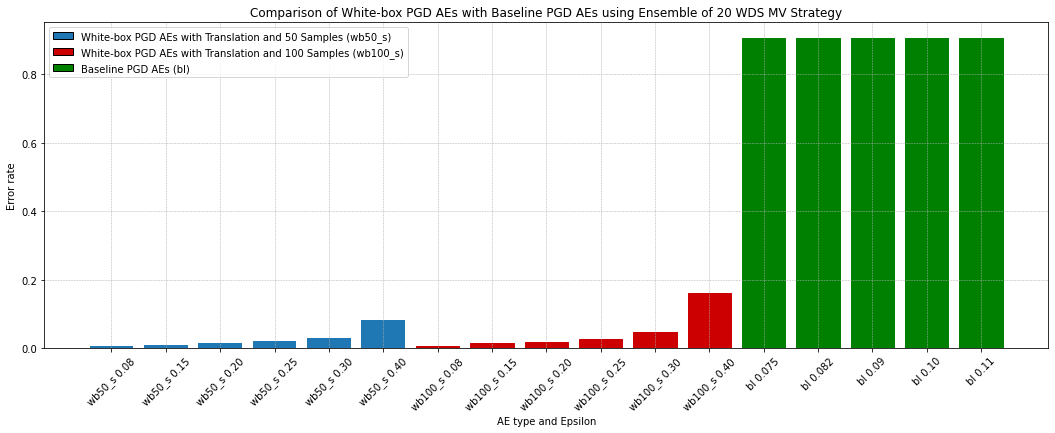

In [7]:
from matplotlib.patches import Patch
w = 0.2
x = [0.08, 0.15, 0.20, 0.25, 0.30, 0.40] #epsilon values for attack

# FGSM-White-box Attack with Rotation Setting in EOT
bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]
bar3 = [i+2*w for i in bar1]
plt.bar(bar1, FGSM_Task2_rot_20MV['UM'], w , label='Undefended Model')
plt.bar(bar2, FGSM_Task2_rot_20MV['Ensemble'], w , label='Ensemble with 20 WDs MV')
plt.bar(bar3, FGSM_Task2_rot_20MV['PGD-ADT'], w , label='PGD-ADT')

plt.xlabel('Epsilon')
plt.ylabel('Error rate')
plt.title('FGSM with Rotation (EOT) Attack using White-box Model 20 WDs MV')
plt.xticks(bar1+w, x)
plt.legend()
plt.show()

# FGSM-White-box Attack with Translation setting in EOT
bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]
bar3 = [i+2*w for i in bar1]
plt.bar(bar1, FGSM_Task2_tran_20MV['UM'], w , label='Undefended Model')
plt.bar(bar2, FGSM_Task2_tran_20MV['Ensemble'], w , label='Ensemble with 20 WDs MV')
plt.bar(bar3, FGSM_Task2_tran_20MV['PGD-ADT'], w , label='PGD-ADT')

plt.xlabel('Epsilon')
plt.ylabel('Error rate')
plt.title('FGSM with Translation (EOT) Attack using White-box Model 20 WDs MV')
plt.xticks(bar1+w, x)
plt.legend()
plt.show()

# PGD-White-box Attack with Translation and 50 num of samples setting in EOT
bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]
bar3 = [i+2*w for i in bar1]
plt.bar(bar1, PGD_Task2_Tran_50_20MV['UM'], w , label='Undefended Model')
plt.bar(bar2, PGD_Task2_Tran_50_20MV['Ensemble'], w , label='Ensemble with 20 WDs MV')
plt.bar(bar3, PGD_Task2_Tran_50_20MV['PGD-ADT'], w , label='PGD-ADT')

plt.xlabel('Epsilon')
plt.ylabel('Error rate')
plt.title('PGD with Translation and 50 samples (EOT) Attack using White-box Model 20 WDs MV')
plt.xticks(bar1+w, x)
plt.legend()
plt.show()

# PGD-White-box Attack with Translation and 100 num of samples setting in EOT
bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]
bar3 = [i+2*w for i in bar1]
plt.bar(bar1, PGD_Task2_Tran_100_20MV['UM'], w , label='Undefended Model')
plt.bar(bar2, PGD_Task2_Tran_100_20MV['Ensemble'], w , label='Ensemble with 20 WDs MV')
plt.bar(bar3, PGD_Task2_Tran_100_20MV['PGD-ADT'], w , label='PGD-ADT')

plt.xlabel('Epsilon')
plt.ylabel('Error rate')
plt.title('PGD with Translation and 100 samples (EOT) Attack using White-box Model 20 WDs MV')
plt.xticks(bar1+w, x)
plt.legend()
plt.show()

# FGSM-Comparison of White-box AEs with Zero-Knowledge AEs
bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]
bar3 = [i+2*w for i in bar1]
plt.bar(bar1, FGSM_Task2_rot_20MV['Ensemble'], w , label='White-box AEs with Rot. EOT')
plt.bar(bar2, FGSM_Task2_tran_20MV['Ensemble'], w , label='White-box AEs with Tran. EOT')
plt.bar(bar3, FGSM_Task1_20MV['Ensemble'], w , label='Zero-knowledge AEs')

plt.xlabel('Epsilon')
plt.ylabel('Error rate')
plt.title('Comparison of White-box FGSM AEs with Zero knowledge FGSM AEs 20WDs MV')
plt.xticks(bar1+w, x)
plt.legend()
plt.show()

# PGD-Comparison of White-box AEs with Zero-Knowledge AEs
bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]
bar3 = [i+2*w for i in bar1]
plt.bar(bar1, PGD_Task2_Tran_50_20MV['Ensemble'], w , label='White-box AEs with Tran. 50 Samples EOT')
plt.bar(bar2, PGD_Task2_Tran_100_20MV['Ensemble'], w , label='White-box AEs with Tran. 100 samples EOT')
plt.bar(bar3, PGD_Task1_20MV['Ensemble'], w , label='Zero-knowledge AEs')

plt.xlabel('Epsilon')
plt.ylabel('Error rate')
plt.title('Comparison of White-box PGD AEs with Zero knowledge PGD AEs 20 WDs MV')
plt.xticks(bar1+w, x)
plt.legend()
plt.show()

# w = 0.6
x_eps = ['wbr 0.08', 'wbr 0.15', 'wbr 0.20', 'wbr 0.25', 'wbr 0.30', 'wbr 0.40','wbt 0.08', 'wbt 0.15', 'wbt 0.20', 'wbt 0.25', 'wbt 0.30', 'wbt 0.40', 'bl 0.10', 'bl 0.15', 'bl 0.20', 'bl 0.25', 'bl 0.30']
new_data = {'Epsilon': x_eps, 'Error rate': FGSM_Task2_rot_20MV['Ensemble']+FGSM_Task2_tran_20MV['Ensemble']+FGSM_baseline_20MV['Ensemble']}

df = pd.DataFrame.from_dict(new_data)

legend_elements = [Patch(edgecolor='black',
                         label='White-box FGSM AEs with Rotation (wbr)'),Patch(facecolor='#CC0000',edgecolor='black',
                         label='White-box FGSM AEs with Translation (wbt)'), Patch(facecolor='green', edgecolor='black',
                         label='Baseline FGSM AEs (bl)')]

fig = plt.figure(figsize = (18, 6))
ax1 = plt.subplot(111)
ret = ax1.bar(df['Epsilon'], df['Error rate'])
ret[6].set_color('#CC0000')
ret[7].set_color('#CC0000')
ret[8].set_color('#CC0000')
ret[9].set_color('#CC0000')
ret[10].set_color('#CC0000')
ret[11].set_color('#CC0000')
ret[12].set_color('green')
ret[13].set_color('green')
ret[14].set_color('green')
ret[15].set_color('green')
ret[16].set_color('green')
ax1.xaxis.grid(linestyle= '--', linewidth=0.5)
ax1.yaxis.grid(linestyle= '--', linewidth=0.5)
ax1.legend(handles=legend_elements)
ax1.set_xticklabels(x_eps, rotation = 45)
ax1.set_xlabel('AE type and Epsilon')
ax1.set_ylabel('Error rate')
ax1.set_title('Comparison of White-box FGSM AEs with Baseline FGSM AEs using Ensemble of 20 WDS MV Strategy')
plt.show()

# PGD-Comparison of White-box AEs with Baseline AEs
x_eps = ['wb50_s 0.08', 'wb50_s 0.15', 'wb50_s 0.20', 'wb50_s 0.25', 'wb50_s 0.30', 'wb50_s 0.40','wb100_s 0.08', 'wb100_s 0.15', 'wb100_s 0.20', 'wb100_s 0.25', 'wb100_s 0.30', 'wb100_s 0.40', 'bl 0.075', 'bl 0.082', 'bl 0.09', 'bl 0.10', 'bl 0.11']
new_data = {'Epsilon': x_eps, 'Error rate': PGD_Task2_Tran_50_20MV['Ensemble']+PGD_Task2_Tran_100_20MV['Ensemble']+PGD_baseline_20MV['Ensemble']}

df = pd.DataFrame.from_dict(new_data)

legend_elements = [Patch(edgecolor='black',
                         label='White-box PGD AEs with Translation and 50 Samples (wb50_s)'),Patch(facecolor='#CC0000',edgecolor='black',
                         label='White-box PGD AEs with Translation and 100 Samples (wb100_s)'), Patch(facecolor='green', edgecolor='black',
                         label='Baseline PGD AEs (bl)')]

fig = plt.figure(figsize = (18, 6))
ax1 = plt.subplot(111)
ret = ax1.bar(df['Epsilon'], df['Error rate'])
ret[6].set_color('#CC0000')
ret[7].set_color('#CC0000')
ret[8].set_color('#CC0000')
ret[9].set_color('#CC0000')
ret[10].set_color('#CC0000')
ret[11].set_color('#CC0000')
ret[12].set_color('green')
ret[13].set_color('green')
ret[14].set_color('green')
ret[15].set_color('green')
ret[16].set_color('green')
ax1.xaxis.grid(linestyle= '--', linewidth=0.5)
ax1.yaxis.grid(linestyle= '--', linewidth=0.5)
ax1.legend(handles=legend_elements)
ax1.set_xticklabels(x_eps, rotation = 45)
ax1.set_xlabel('AE type and Epsilon')
ax1.set_ylabel('Error rate')
ax1.set_title('Comparison of White-box PGD AEs with Baseline PGD AEs using Ensemble of 20 WDS MV Strategy')
plt.show()


# Evaluation with 40 WDs

## With AVEP Strategy

In [8]:
task2_eval_40wAVEP = {'UM': [0.01314459049544995, 0.030333670374115267, 0.07381193124368049, 0.21638018200202225, 0.4408493427704752, 0.8119312436804853, 0.006066734074823054, 0.021233569261880688, 0.056622851365015166, 0.18099089989888775, 0.40141557128412536, 0.7785642062689585, 0.0010111223458038423, 0.00910010111223458, 0.020222446916076844, 0.033367037411526794, 0.047522750252780584, 0.11830131445904954, 0.003033367037411527, 0.017189079878665317, 0.024266936299292215, 0.042467138523761376, 0.07987866531850354, 0.20525783619817997], 'Ensemble': [0.008088978766430738, 0.019211324570273004, 0.029322548028311426, 0.06673407482305359, 0.17795753286147623, 0.627906976744186, 0.005055611729019211, 0.010111223458038422, 0.017189079878665317, 0.03943377148634985, 0.1122345803842265, 0.49646107178968657, 0.004044489383215369, 0.008088978766430738, 0.01314459049544995, 0.017189079878665317, 0.023255813953488372, 0.05358948432760364, 0.004044489383215369, 0.00910010111223458, 0.015166835187057633, 0.020222446916076844, 0.03640040444893832, 0.1051567239635996], 'PGD-ADT': [0.00910010111223458, 0.016177957532861477, 0.027300303336703743, 0.03842264914054601, 0.07684529828109202, 0.42972699696663297, 0.00910010111223458, 0.011122345803842264, 0.015166835187057633, 0.022244691607684528, 0.0525783619817998, 0.3488372093023256, 0.008088978766430738, 0.012133468149646108, 0.011122345803842264, 0.01314459049544995, 0.01820020222446916, 0.032355915065722954, 0.00910010111223458, 0.010111223458038422, 0.00910010111223458, 0.01314459049544995, 0.020222446916076844, 0.05358948432760364]}

task1_eval_40wAVEP = {'UM': [0.16683518705763398, 0.5005055611729019, 0.717896865520728, 0.8291203235591507, 0.8796764408493428, 0.9069767441860465, 0.3862487360970677, 0.9474216380182002, 0.9858442871587462, 0.9888776541961577, 0.9888776541961577, 0.9888776541961577, 0.9474216380182002, 0.9858442871587462, 0.9888776541961577, 0.9888776541961577, 0.9888776541961577, 0.9888776541961577, 0.9059656218402427, 0.9817997977755308, 0.9888776541961577, 0.9888776541961577, 0.9888776541961577, 0.6703741152679474, 0.9888776541961577, 0.9888776541961577, 0.9888776541961577, 0.9888776541961577, 0.9888776541961577, 0.6804853387259858, 0.9888776541961577, 0.9888776541961577, 0.9888776541961577, 0.9888776541961577, 0.9888776541961577], 'Ensemble': [0.010111223458038422, 0.021233569261880688, 0.03640040444893832, 0.10414560161779575, 0.26693629929221435, 0.750252780586451, 0.010111223458038422, 0.024266936299292215, 0.042467138523761376, 0.08088978766430738, 0.1263902932254803, 0.31749241658240646, 0.024266936299292215, 0.042467138523761376, 0.12537917087967643, 0.24974721941354905, 0.32861476238624876, 0.34984833164812945, 0.021233569261880688, 0.04954499494438827, 0.12537917087967643, 0.21132457027300303, 0.2537917087967644, 0.012133468149646108, 0.0262891809908999, 0.06370070778564206, 0.15369059656218403, 0.3518705763397371, 0.6875631951466128, 0.011122345803842264, 0.027300303336703743, 0.06268958543983821, 0.16177957532861476, 0.35995955510616784, 0.6936299292214358], 'PGD-ADT': [0.015166835187057633, 0.03741152679474216, 0.05358948432760364, 0.10616784630940344, 0.19716885743174925, 0.6703741152679474, 0.015166835187057633, 0.03640040444893832, 0.055611729019211326, 0.10414560161779575, 0.15874620829120323, 0.39838220424671383, 0.03640040444893832, 0.055611729019211326, 0.15874620829120323, 0.27401415571284127, 0.29625884732052576, 0.2770475227502528, 0.03741152679474216, 0.05864509605662285, 0.15874620829120323, 0.2659251769464105, 0.301314459049545, 0.016177957532861477, 0.044489383215369056, 0.07987866531850354, 0.16582406471183014, 0.3640040444893832, 0.80788675429727, 0.016177957532861477, 0.046511627906976744, 0.07785642062689585, 0.17290192113245703, 0.3710819009100101, 0.8220424671385238]}

baseline_aes_eval_40wAVEP = {'UM': [0.8998988877654196, 0.8918099089989889, 0.8938321536905965, 0.884732052578362, 0.884732052578362, 0.8968655207280081, 0.8958543983822043, 0.8867542972699697, 0.8958543983822043, 0.8928210313447927], 'Ensemble': [0.9069767441860465, 0.9079878665318504, 0.9059656218402427, 0.9069767441860465, 0.8918099089989889, 0.9049544994944388, 0.9039433771486349, 0.9049544994944388, 0.9069767441860465, 0.9059656218402427], 'PGD-ADT': [0.9019211324570273, 0.9049544994944388, 0.9039433771486349, 0.9009100101112234, 0.8928210313447927, 0.9019211324570273, 0.9019211324570273, 0.9029322548028311, 0.9029322548028311, 0.9039433771486349]}

task2_eval_40wMV = {'UM': [0.01314459049544995, 0.030333670374115267, 0.07381193124368049, 0.21638018200202225, 0.4408493427704752, 0.8119312436804853, 0.006066734074823054, 0.021233569261880688, 0.056622851365015166, 0.18099089989888775, 0.40141557128412536, 0.7785642062689585, 0.0010111223458038423, 0.00910010111223458, 0.020222446916076844, 0.033367037411526794, 0.047522750252780584, 0.11830131445904954, 0.003033367037411527, 0.017189079878665317, 0.024266936299292215, 0.042467138523761376, 0.07987866531850354, 0.20525783619817997], 'Ensemble': [0.008088978766430738, 0.019211324570273004, 0.028311425682507583, 0.06774519716885744, 0.17795753286147623, 0.6268958543983822, 0.005055611729019211, 0.010111223458038422, 0.016177957532861477, 0.03842264914054601, 0.10920121334681497, 0.48938321536905965, 0.004044489383215369, 0.008088978766430738, 0.01314459049544995, 0.016177957532861477, 0.023255813953488372, 0.055611729019211326, 0.004044489383215369, 0.00910010111223458, 0.015166835187057633, 0.020222446916076844, 0.034378159757330634, 0.10920121334681497], 'PGD-ADT': [0.00910010111223458, 0.016177957532861477, 0.027300303336703743, 0.03842264914054601, 0.07684529828109202, 0.42972699696663297, 0.00910010111223458, 0.011122345803842264, 0.015166835187057633, 0.022244691607684528, 0.0525783619817998, 0.3488372093023256, 0.008088978766430738, 0.012133468149646108, 0.011122345803842264, 0.01314459049544995, 0.01820020222446916, 0.032355915065722954, 0.00910010111223458, 0.010111223458038422, 0.00910010111223458, 0.01314459049544995, 0.020222446916076844, 0.05358948432760364]}

task1_eval_40wMV = {'UM': [0.16683518705763398, 0.5005055611729019, 0.717896865520728, 0.8291203235591507, 0.8796764408493428, 0.9069767441860465, 0.3862487360970677, 0.9474216380182002, 0.9858442871587462, 0.9888776541961577, 0.9888776541961577, 0.9888776541961577, 0.9474216380182002, 0.9858442871587462, 0.9888776541961577, 0.9888776541961577, 0.9888776541961577, 0.9888776541961577, 0.9059656218402427, 0.9817997977755308, 0.9888776541961577, 0.9888776541961577, 0.9888776541961577, 0.6703741152679474, 0.9888776541961577, 0.9888776541961577, 0.9888776541961577, 0.9888776541961577, 0.9888776541961577, 0.6804853387259858, 0.9888776541961577, 0.9888776541961577, 0.9888776541961577, 0.9888776541961577, 0.9888776541961577], 'Ensemble': [0.00910010111223458, 0.021233569261880688, 0.03741152679474216, 0.10212335692618807, 0.268958543983822, 0.7532861476238625, 0.010111223458038422, 0.023255813953488372, 0.042467138523761376, 0.08088978766430738, 0.12841253791708795, 0.3195146612740142, 0.024266936299292215, 0.042467138523761376, 0.12740141557128412, 0.2537917087967644, 0.3306370070778564, 0.3488372093023256, 0.021233569261880688, 0.05055611729019211, 0.1263902932254803, 0.2123356926188069, 0.25480283114256824, 0.012133468149646108, 0.027300303336703743, 0.06572295247724974, 0.15369059656218403, 0.3518705763397371, 0.6875631951466128, 0.012133468149646108, 0.0262891809908999, 0.06572295247724974, 0.16380182002022245, 0.3619817997977755, 0.6926188068756319], 'PGD-ADT': [0.015166835187057633, 0.03741152679474216, 0.05358948432760364, 0.10616784630940344, 0.19716885743174925, 0.6703741152679474, 0.015166835187057633, 0.03640040444893832, 0.055611729019211326, 0.10414560161779575, 0.15874620829120323, 0.39838220424671383, 0.03640040444893832, 0.055611729019211326, 0.15874620829120323, 0.27401415571284127, 0.29625884732052576, 0.2770475227502528, 0.03741152679474216, 0.05864509605662285, 0.15874620829120323, 0.2659251769464105, 0.301314459049545, 0.016177957532861477, 0.044489383215369056, 0.07987866531850354, 0.16582406471183014, 0.3640040444893832, 0.80788675429727, 0.016177957532861477, 0.046511627906976744, 0.07785642062689585, 0.17290192113245703, 0.3710819009100101, 0.8220424671385238]}

baseline_aes_eval_40wMV = {'UM': [0.8998988877654196, 0.8918099089989889, 0.8938321536905965, 0.884732052578362, 0.884732052578362, 0.8968655207280081, 0.8958543983822043, 0.8867542972699697, 0.8958543983822043, 0.8928210313447927], 'Ensemble': [0.9069767441860465, 0.9079878665318504, 0.9069767441860465, 0.9059656218402427, 0.8918099089989889, 0.9049544994944388, 0.9039433771486349, 0.9049544994944388, 0.9069767441860465, 0.9059656218402427], 'PGD-ADT': [0.9019211324570273, 0.9049544994944388, 0.9039433771486349, 0.9009100101112234, 0.8928210313447927, 0.9019211324570273, 0.9019211324570273, 0.9029322548028311, 0.9029322548028311, 0.9039433771486349]}

In [9]:
FGSM_Task2_rot_40AVEP = {}
FGSM_Task2_tran_40AVEP = {}
PGD_Task2_Tran_50_40AVEP = {}
PGD_Task2_Tran_100_40AVEP = {}

FGSM_Task1_40AVEP = {}
PGD_Task1_40AVEP = {}

FGSM_baseline_40AVEP = {}
PGD_baseline_40AVEP = {}

FGSM_Task2_rot_40MV = {}
FGSM_Task2_tran_40MV = {}
PGD_Task2_Tran_50_40MV = {}
PGD_Task2_Tran_100_40MV = {}

FGSM_Task1_40MV = {}
PGD_Task1_40MV = {}

FGSM_baseline_40MV = {}
PGD_baseline_40MV = {}

In [10]:
# FGSM-white-box with Rotation
FGSM_Task2_rot_40AVEP['UM'] = task2_eval_40wAVEP['UM'][:6]
FGSM_Task2_rot_40AVEP['Ensemble'] = task2_eval_40wAVEP['Ensemble'][:6]
FGSM_Task2_rot_40AVEP['PGD-ADT'] = task2_eval_40wAVEP['PGD-ADT'][:6]
print("FGSM_Task2_rot_40AVEP_UM =", FGSM_Task2_rot_40AVEP['UM'])
print("FGSM_Task2_rot_40AVEP['Ensemble'] =",  FGSM_Task2_rot_40AVEP['Ensemble'])
print("FGSM_Task2_rot_40AVEP['ADT'] =", FGSM_Task2_rot_40AVEP['PGD-ADT'])

# FGSM-white-box with Translation
FGSM_Task2_tran_40AVEP['UM'] = task2_eval_40wAVEP['UM'][6:12]
FGSM_Task2_tran_40AVEP['Ensemble'] = task2_eval_40wAVEP['Ensemble'][6:12]
FGSM_Task2_tran_40AVEP['PGD-ADT'] = task2_eval_40wAVEP['PGD-ADT'][6:12]
print("FGSM_Task2_tran_40AVEP['UM'] =",FGSM_Task2_tran_40AVEP['UM'])
print("FGSM_Task2_tran_40AVEP['EN'] =",FGSM_Task2_tran_40AVEP['Ensemble'])
print("FGSM_Task2_tran_40AVEP['UM'] =",FGSM_Task2_tran_40AVEP['PGD-ADT'])

# PGD-white-box with Translation at 50 Number of Samples
PGD_Task2_Tran_50_40AVEP['UM'] = task2_eval_40wAVEP['UM'][12:18]
PGD_Task2_Tran_50_40AVEP['Ensemble'] = task2_eval_40wAVEP['Ensemble'][12:18]
PGD_Task2_Tran_50_40AVEP['PGD-ADT'] = task2_eval_40wAVEP['PGD-ADT'][12:18]
print("PGD_Task2_Tran_50_40AVEP['UM'] =", PGD_Task2_Tran_50_40AVEP['UM'])
print("PGD_Task2_Tran_50_40AVEP['EN'] =",PGD_Task2_Tran_50_40AVEP['Ensemble'])
print("PGD_Task2_Tran_50_40AVEP['ADT'] =",PGD_Task2_Tran_50_40AVEP['PGD-ADT'])

# PGD-white-box with Translation at 100 Number of Samples
PGD_Task2_Tran_100_40AVEP['UM'] = task2_eval_40wAVEP['UM'][18:]
PGD_Task2_Tran_100_40AVEP['Ensemble'] = task2_eval_40wAVEP['Ensemble'][18:]
PGD_Task2_Tran_100_40AVEP['PGD-ADT'] = task2_eval_40wAVEP['PGD-ADT'][18:]
print("PGD_Task2_Tran_100_40AVEP['UM'] =",PGD_Task2_Tran_100_40AVEP['UM'])
print("PGD_Task2_Tran_100_40AVEP['EN'] =",PGD_Task2_Tran_100_40AVEP['Ensemble'])
print("PGD_Task2_Tran_100_40AVEP['ADT'] =",PGD_Task2_Tran_100_40AVEP['PGD-ADT'])

# FGSM-Zero-Knowledge 
FGSM_Task1_40AVEP['UM'] = task1_eval_40wAVEP['UM'][:6]
FGSM_Task1_40AVEP['Ensemble'] = task1_eval_40wAVEP['Ensemble'][:6]
FGSM_Task1_40AVEP['PGD-ADT'] = task1_eval_40wAVEP['PGD-ADT'][:6]
print("FGSM_Task1_40AVEP['UM'] =",FGSM_Task1_40AVEP['UM'])
print("FGSM_Task1_40AVEP['EN'] =",FGSM_Task1_40AVEP['Ensemble'])
print("FGSM_Task1_40AVEP['ADT'] =",FGSM_Task1_40AVEP['PGD-ADT'])

# PGD-Zero-Knowledge 
PGD_Task1_40AVEP['UM'] = task1_eval_40wAVEP['UM'][6:12]
PGD_Task1_40AVEP['Ensemble'] = task1_eval_40wAVEP['Ensemble'][6:12]
PGD_Task1_40AVEP['PGD-ADT'] = task1_eval_40wAVEP['PGD-ADT'][6:12]
print("PGD_Task1_40AVEP['UM'] =",PGD_Task1_40AVEP['UM'])
print("PGD_Task1_40AVEP['EN'] =",PGD_Task1_40AVEP['Ensemble'])
print("PGD_Task1_40AVEP['ADT'] =",PGD_Task1_40AVEP['PGD-ADT'])

# FGSM-baseline AEs 
FGSM_baseline_40AVEP['UM'] = baseline_aes_eval_40wAVEP['UM'][:5]
FGSM_baseline_40AVEP['Ensemble'] = baseline_aes_eval_40wAVEP['Ensemble'][:5]
FGSM_baseline_40AVEP['PGD-ADT'] = baseline_aes_eval_40wAVEP['PGD-ADT'][:5]
print("FGSM_baseline_40AVEP['UM'] =",FGSM_baseline_40AVEP['UM'])
print("FGSM_baseline_40AVEP['EN'] =",FGSM_baseline_40AVEP['Ensemble'])
print("FGSM_baseline_40AVEP['ADT'] =",FGSM_baseline_40AVEP['PGD-ADT'])

# PGD-Baseline AEs 
PGD_baseline_40AVEP['UM'] = baseline_aes_eval_40wAVEP['UM'][5:]
PGD_baseline_40AVEP['Ensemble'] = baseline_aes_eval_40wAVEP['Ensemble'][5:]
PGD_baseline_40AVEP['PGD-ADT'] = baseline_aes_eval_40wAVEP['PGD-ADT'][5:]
print("PGD_baseline_40AVEP['UM'] =",PGD_baseline_40AVEP['UM'])
print("PGD_baseline_40AVEP['EN'] =",PGD_baseline_40AVEP['Ensemble'])
print("PGD_baseline_40AVEP['ADT'] =",PGD_baseline_40AVEP['PGD-ADT'])

FGSM_Task2_rot_40AVEP_UM = [0.01314459049544995, 0.030333670374115267, 0.07381193124368049, 0.21638018200202225, 0.4408493427704752, 0.8119312436804853]
FGSM_Task2_rot_40AVEP['Ensemble'] = [0.008088978766430738, 0.019211324570273004, 0.029322548028311426, 0.06673407482305359, 0.17795753286147623, 0.627906976744186]
FGSM_Task2_rot_40AVEP['ADT'] = [0.00910010111223458, 0.016177957532861477, 0.027300303336703743, 0.03842264914054601, 0.07684529828109202, 0.42972699696663297]
FGSM_Task2_tran_40AVEP['UM'] = [0.006066734074823054, 0.021233569261880688, 0.056622851365015166, 0.18099089989888775, 0.40141557128412536, 0.7785642062689585]
FGSM_Task2_tran_40AVEP['EN'] = [0.005055611729019211, 0.010111223458038422, 0.017189079878665317, 0.03943377148634985, 0.1122345803842265, 0.49646107178968657]
FGSM_Task2_tran_40AVEP['UM'] = [0.00910010111223458, 0.011122345803842264, 0.015166835187057633, 0.022244691607684528, 0.0525783619817998, 0.3488372093023256]
PGD_Task2_Tran_50_40AVEP['UM'] = [0.00101112

### Plots of AVEP with 40 WDs

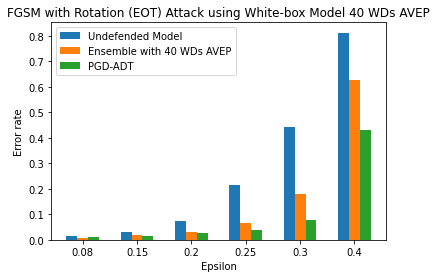

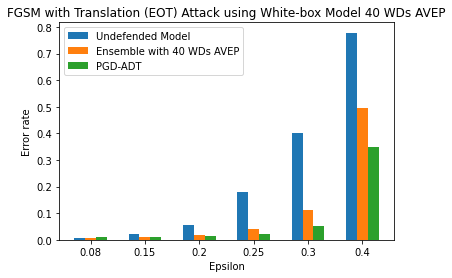

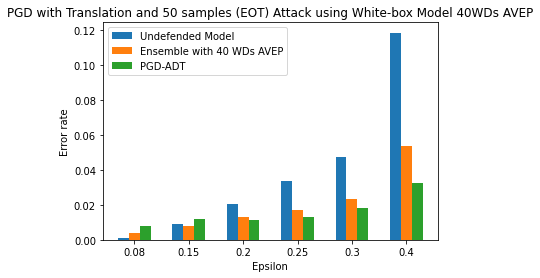

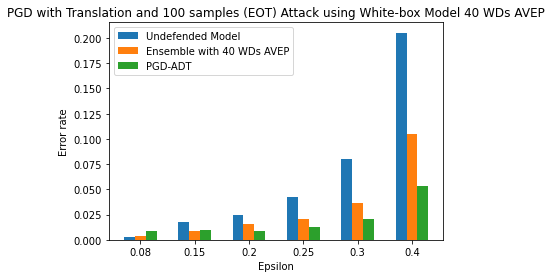

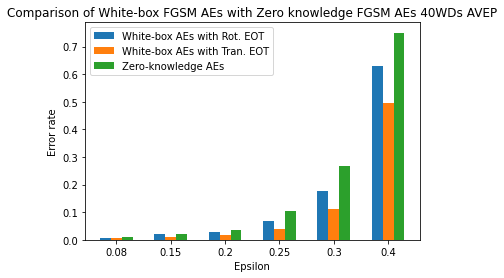

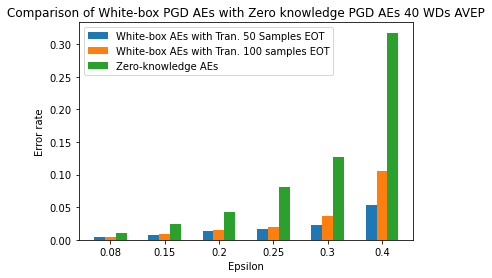

C:\Users\hezek\.conda\envs\athena\lib\site-packages\ipykernel_launcher.py:123: UserWarning: FixedFormatter should only be used together with FixedLocator


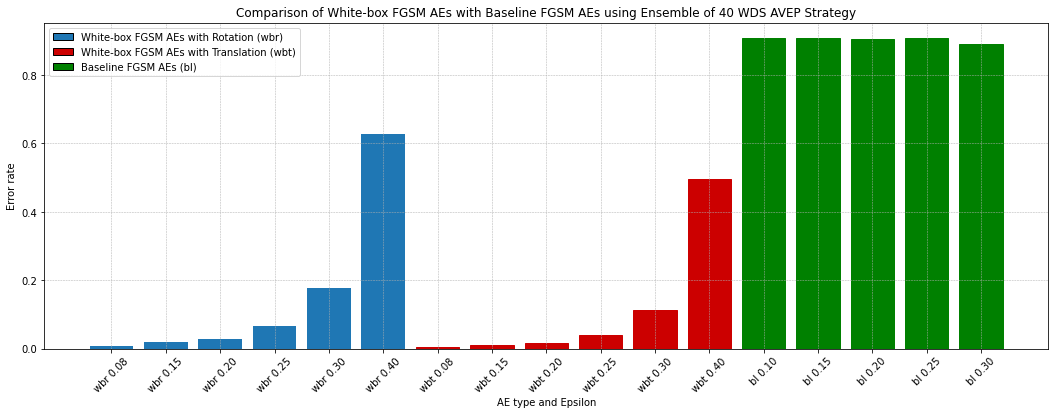

C:\Users\hezek\.conda\envs\athena\lib\site-packages\ipykernel_launcher.py:157: UserWarning: FixedFormatter should only be used together with FixedLocator


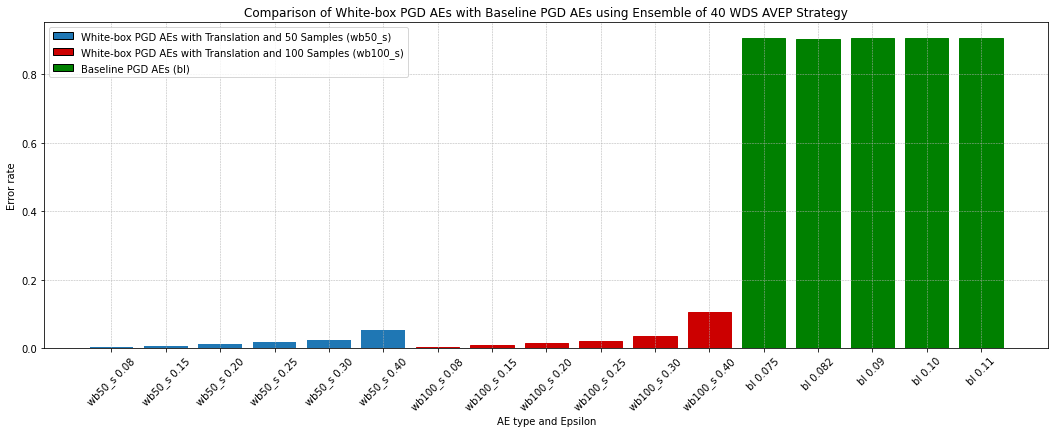

In [11]:
from matplotlib.patches import Patch
w = 0.2
x = [0.08, 0.15, 0.20, 0.25, 0.30, 0.40] #epsilon values for attack

# FGSM-White-box Attack with Rotation Setting in EOT
bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]
bar3 = [i+2*w for i in bar1]
plt.bar(bar1, FGSM_Task2_rot_40AVEP['UM'], w , label='Undefended Model')
plt.bar(bar2, FGSM_Task2_rot_40AVEP['Ensemble'], w , label='Ensemble with 40 WDs AVEP')
plt.bar(bar3, FGSM_Task2_rot_40AVEP['PGD-ADT'], w , label='PGD-ADT')

plt.xlabel('Epsilon')
plt.ylabel('Error rate')
plt.title('FGSM with Rotation (EOT) Attack using White-box Model 40 WDs AVEP')
plt.xticks(bar1+w, x)
plt.legend()
plt.show()

# FGSM-White-box Attack with Translation setting in EOT
bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]
bar3 = [i+2*w for i in bar1]
plt.bar(bar1, FGSM_Task2_tran_40AVEP['UM'], w , label='Undefended Model')
plt.bar(bar2, FGSM_Task2_tran_40AVEP['Ensemble'], w , label='Ensemble with 40 WDs AVEP')
plt.bar(bar3, FGSM_Task2_tran_40AVEP['PGD-ADT'], w , label='PGD-ADT')

plt.xlabel('Epsilon')
plt.ylabel('Error rate')
plt.title('FGSM with Translation (EOT) Attack using White-box Model 40 WDs AVEP')
plt.xticks(bar1+w, x)
plt.legend()
plt.show()

# PGD-White-box Attack with Translation and 50 num of samples setting in EOT
bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]
bar3 = [i+2*w for i in bar1]
plt.bar(bar1, PGD_Task2_Tran_50_40AVEP['UM'], w , label='Undefended Model')
plt.bar(bar2, PGD_Task2_Tran_50_40AVEP['Ensemble'], w , label='Ensemble with 40 WDs AVEP')
plt.bar(bar3, PGD_Task2_Tran_50_40AVEP['PGD-ADT'], w , label='PGD-ADT')

plt.xlabel('Epsilon')
plt.ylabel('Error rate')
plt.title('PGD with Translation and 50 samples (EOT) Attack using White-box Model 40WDs AVEP')
plt.xticks(bar1+w, x)
plt.legend()
plt.show()

# PGD-White-box Attack with Translation and 100 num of samples setting in EOT
bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]
bar3 = [i+2*w for i in bar1]
plt.bar(bar1, PGD_Task2_Tran_100_40AVEP['UM'], w , label='Undefended Model')
plt.bar(bar2, PGD_Task2_Tran_100_40AVEP['Ensemble'], w , label='Ensemble with 40 WDs AVEP')
plt.bar(bar3, PGD_Task2_Tran_100_40AVEP['PGD-ADT'], w , label='PGD-ADT')

plt.xlabel('Epsilon')
plt.ylabel('Error rate')
plt.title('PGD with Translation and 100 samples (EOT) Attack using White-box Model 40 WDs AVEP')
plt.xticks(bar1+w, x)
plt.legend()
plt.show()

# FGSM-Comparison of White-box AEs with Zero-Knowledge AEs
bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]
bar3 = [i+2*w for i in bar1]
plt.bar(bar1, FGSM_Task2_rot_40AVEP['Ensemble'], w , label='White-box AEs with Rot. EOT')
plt.bar(bar2, FGSM_Task2_tran_40AVEP['Ensemble'], w , label='White-box AEs with Tran. EOT')
plt.bar(bar3, FGSM_Task1_40AVEP['Ensemble'], w , label='Zero-knowledge AEs')

plt.xlabel('Epsilon')
plt.ylabel('Error rate')
plt.title('Comparison of White-box FGSM AEs with Zero knowledge FGSM AEs 40WDs AVEP')
plt.xticks(bar1+w, x)
plt.legend()
plt.show()

# PGD-Comparison of White-box AEs with Zero-Knowledge AEs
bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]
bar3 = [i+2*w for i in bar1]
plt.bar(bar1, PGD_Task2_Tran_50_40AVEP['Ensemble'], w , label='White-box AEs with Tran. 50 Samples EOT')
plt.bar(bar2, PGD_Task2_Tran_100_40AVEP['Ensemble'], w , label='White-box AEs with Tran. 100 samples EOT')
plt.bar(bar3, PGD_Task1_40AVEP['Ensemble'], w , label='Zero-knowledge AEs')

plt.xlabel('Epsilon')
plt.ylabel('Error rate')
plt.title('Comparison of White-box PGD AEs with Zero knowledge PGD AEs 40 WDs AVEP')
plt.xticks(bar1+w, x)
plt.legend()
plt.show()

# w = 0.6
x_eps = ['wbr 0.08', 'wbr 0.15', 'wbr 0.20', 'wbr 0.25', 'wbr 0.30', 'wbr 0.40','wbt 0.08', 'wbt 0.15', 'wbt 0.20', 'wbt 0.25', 'wbt 0.30', 'wbt 0.40', 'bl 0.10', 'bl 0.15', 'bl 0.20', 'bl 0.25', 'bl 0.30']
new_data = {'Epsilon': x_eps, 'Error rate': FGSM_Task2_rot_40AVEP['Ensemble']+FGSM_Task2_tran_40AVEP['Ensemble']+FGSM_baseline_40AVEP['Ensemble']}

df = pd.DataFrame.from_dict(new_data)

legend_elements = [Patch(edgecolor='black',
                         label='White-box FGSM AEs with Rotation (wbr)'),Patch(facecolor='#CC0000',edgecolor='black',
                         label='White-box FGSM AEs with Translation (wbt)'), Patch(facecolor='green', edgecolor='black',
                         label='Baseline FGSM AEs (bl)')]

fig = plt.figure(figsize = (18, 6))
ax1 = plt.subplot(111)
ret = ax1.bar(df['Epsilon'], df['Error rate'])
ret[6].set_color('#CC0000')
ret[7].set_color('#CC0000')
ret[8].set_color('#CC0000')
ret[9].set_color('#CC0000')
ret[10].set_color('#CC0000')
ret[11].set_color('#CC0000')
ret[12].set_color('green')
ret[13].set_color('green')
ret[14].set_color('green')
ret[15].set_color('green')
ret[16].set_color('green')
ax1.xaxis.grid(linestyle= '--', linewidth=0.5)
ax1.yaxis.grid(linestyle= '--', linewidth=0.5)
ax1.legend(handles=legend_elements)
ax1.set_xticklabels(x_eps, rotation = 45)
ax1.set_xlabel('AE type and Epsilon')
ax1.set_ylabel('Error rate')
ax1.set_title('Comparison of White-box FGSM AEs with Baseline FGSM AEs using Ensemble of 40 WDS AVEP Strategy')
plt.show()

# PGD-Comparison of White-box AEs with Baseline AEs
x_eps = ['wb50_s 0.08', 'wb50_s 0.15', 'wb50_s 0.20', 'wb50_s 0.25', 'wb50_s 0.30', 'wb50_s 0.40','wb100_s 0.08', 'wb100_s 0.15', 'wb100_s 0.20', 'wb100_s 0.25', 'wb100_s 0.30', 'wb100_s 0.40', 'bl 0.075', 'bl 0.082', 'bl 0.09', 'bl 0.10', 'bl 0.11']
new_data = {'Epsilon': x_eps, 'Error rate': PGD_Task2_Tran_50_40AVEP['Ensemble']+PGD_Task2_Tran_100_40AVEP['Ensemble']+PGD_baseline_40AVEP['Ensemble']}

df = pd.DataFrame.from_dict(new_data)

legend_elements = [Patch(edgecolor='black',
                         label='White-box PGD AEs with Translation and 50 Samples (wb50_s)'),Patch(facecolor='#CC0000',edgecolor='black',
                         label='White-box PGD AEs with Translation and 100 Samples (wb100_s)'), Patch(facecolor='green', edgecolor='black',
                         label='Baseline PGD AEs (bl)')]

fig = plt.figure(figsize = (18, 6))
ax1 = plt.subplot(111)
ret = ax1.bar(df['Epsilon'], df['Error rate'])
ret[6].set_color('#CC0000')
ret[7].set_color('#CC0000')
ret[8].set_color('#CC0000')
ret[9].set_color('#CC0000')
ret[10].set_color('#CC0000')
ret[11].set_color('#CC0000')
ret[12].set_color('green')
ret[13].set_color('green')
ret[14].set_color('green')
ret[15].set_color('green')
ret[16].set_color('green')
ax1.xaxis.grid(linestyle= '--', linewidth=0.5)
ax1.yaxis.grid(linestyle= '--', linewidth=0.5)
ax1.legend(handles=legend_elements)
ax1.set_xticklabels(x_eps, rotation = 45)
ax1.set_xlabel('AE type and Epsilon')
ax1.set_ylabel('Error rate')
ax1.set_title('Comparison of White-box PGD AEs with Baseline PGD AEs using Ensemble of 40 WDS AVEP Strategy')
plt.show()

## Evaluation Using 40 WDs with MV Strategy

In [12]:
# FGSM-white-box with Rotation
FGSM_Task2_rot_40MV['UM'] = task2_eval_40wMV['UM'][:6]
FGSM_Task2_rot_40MV['Ensemble'] = task2_eval_40wMV['Ensemble'][:6]
FGSM_Task2_rot_40MV['PGD-ADT'] = task2_eval_40wMV['PGD-ADT'][:6]
print("FGSM_Task2_rot_40MV['UM'] =",FGSM_Task2_rot_40MV['UM'])
print("FGSM_Task2_rot_40MV['EN'] =",FGSM_Task2_rot_40MV['Ensemble'])
print("FGSM_Task2_rot_40MV['ADT'] =",FGSM_Task2_rot_40MV['PGD-ADT'])

# FGSM-white-box with Translation
FGSM_Task2_tran_40MV['UM'] = task2_eval_40wMV['UM'][6:12]
FGSM_Task2_tran_40MV['Ensemble'] = task2_eval_40wMV['Ensemble'][6:12]
FGSM_Task2_tran_40MV['PGD-ADT'] = task2_eval_40wMV['PGD-ADT'][6:12]
print("FGSM_Task2_tran_40MV['UM'] =",FGSM_Task2_tran_40MV['UM'])
print("FGSM_Task2_tran_40MV['EN'] =",FGSM_Task2_tran_40MV['Ensemble'])
print("FGSM_Task2_tran_40MV['ADT'] =",FGSM_Task2_tran_40MV['PGD-ADT'])

# PGD-white-box with Translation at 50 Number of Samples
PGD_Task2_Tran_50_40MV['UM'] = task2_eval_40wMV['UM'][12:18]
PGD_Task2_Tran_50_40MV['Ensemble'] = task2_eval_40wMV['Ensemble'][12:18]
PGD_Task2_Tran_50_40MV['PGD-ADT'] = task2_eval_40wMV['PGD-ADT'][12:18]
print("PGD_Task2_Tran_50_40MV['UM'] =",PGD_Task2_Tran_50_20MV['UM'])
print("PGD_Task2_Tran_50_40MV['EN'] =",PGD_Task2_Tran_50_20MV['Ensemble'])
print("PGD_Task2_Tran_50_40MV['ADT'] =",PGD_Task2_Tran_50_20MV['PGD-ADT'])

# PGD-white-box with Translation at 100 Number of Samples
PGD_Task2_Tran_100_40MV['UM'] = task2_eval_40wMV['UM'][18:]
PGD_Task2_Tran_100_40MV['Ensemble'] = task2_eval_40wMV['Ensemble'][18:]
PGD_Task2_Tran_100_40MV['PGD-ADT'] = task2_eval_40wMV['PGD-ADT'][18:]
print("PGD_Task2_Tran_100_40MV['UM'] =",PGD_Task2_Tran_100_40MV['UM'])
print("PGD_Task2_Tran_100_40MV['EN'] =",PGD_Task2_Tran_100_40MV['Ensemble'])
print("PGD_Task2_Tran_100_40MV['ADT'] =",PGD_Task2_Tran_100_40MV['PGD-ADT'])

# FGSM-Zero-Knowledge 
FGSM_Task1_40MV['UM'] = task1_eval_40wMV['UM'][:6]
FGSM_Task1_40MV['Ensemble'] = task1_eval_40wMV['Ensemble'][:6]
FGSM_Task1_40MV['PGD-ADT'] = task1_eval_40wMV['PGD-ADT'][:6]
print("FGSM_Task1_40MV['UM'] =",FGSM_Task1_40MV['UM'])
print("FGSM_Task1_40MV['EN'] =",FGSM_Task1_40MV['Ensemble'])
print("FGSM_Task1_40MV['ADT'] =",FGSM_Task1_40MV['PGD-ADT'])

# PGD-Zero-Knowledge 
PGD_Task1_40MV['UM'] = task1_eval_40wMV['UM'][6:12]
PGD_Task1_40MV['Ensemble'] = task1_eval_40wMV['Ensemble'][6:12]
PGD_Task1_40MV['PGD-ADT'] = task1_eval_40wMV['PGD-ADT'][6:12]
print("PGD_Task1_40MV['UM'] =",PGD_Task1_40MV['UM'])
print("PGD_Task1_40MV['EN'] =",PGD_Task1_40MV['Ensemble'])
print("PGD_Task1_40MV['ADT'] =",PGD_Task1_40MV['PGD-ADT'])

# FGSM-baseline AEs 
FGSM_baseline_40MV['UM'] = baseline_aes_eval_40wMV['UM'][:5]
FGSM_baseline_40MV['Ensemble'] = baseline_aes_eval_40wMV['Ensemble'][:5]
FGSM_baseline_40MV['PGD-ADT'] = baseline_aes_eval_40wMV['PGD-ADT'][:5]
print("FGSM_baseline_40MV['UM'] =",FGSM_baseline_40MV['UM'])
print("FGSM_baseline_40MV['EN'] =",FGSM_baseline_40MV['Ensemble'])
print("FGSM_baseline_40MV['ADT'] =",FGSM_baseline_40MV['PGD-ADT'])

# PGD-Baseline AEs 
PGD_baseline_40MV['UM'] = baseline_aes_eval_40wMV['UM'][5:]
PGD_baseline_40MV['Ensemble'] = baseline_aes_eval_40wMV['Ensemble'][5:]
PGD_baseline_40MV['PGD-ADT'] = baseline_aes_eval_40wMV['PGD-ADT'][5:]
print("PGD_baseline_40MV['UM'] =",PGD_baseline_40MV['UM'])
print("PGD_baseline_40MV['EN'] =",PGD_baseline_40MV['Ensemble'])
print("PGD_baseline_40MV['ADT'] =",PGD_baseline_40MV['PGD-ADT'])

FGSM_Task2_rot_40MV['UM'] = [0.01314459049544995, 0.030333670374115267, 0.07381193124368049, 0.21638018200202225, 0.4408493427704752, 0.8119312436804853]
FGSM_Task2_rot_40MV['EN'] = [0.008088978766430738, 0.019211324570273004, 0.028311425682507583, 0.06774519716885744, 0.17795753286147623, 0.6268958543983822]
FGSM_Task2_rot_40MV['ADT'] = [0.00910010111223458, 0.016177957532861477, 0.027300303336703743, 0.03842264914054601, 0.07684529828109202, 0.42972699696663297]
FGSM_Task2_tran_40MV['UM'] = [0.006066734074823054, 0.021233569261880688, 0.056622851365015166, 0.18099089989888775, 0.40141557128412536, 0.7785642062689585]
FGSM_Task2_tran_40MV['EN'] = [0.005055611729019211, 0.010111223458038422, 0.016177957532861477, 0.03842264914054601, 0.10920121334681497, 0.48938321536905965]
FGSM_Task2_tran_40MV['ADT'] = [0.00910010111223458, 0.011122345803842264, 0.015166835187057633, 0.022244691607684528, 0.0525783619817998, 0.3488372093023256]
PGD_Task2_Tran_50_40MV['UM'] = [0.0010111223458038423, 0

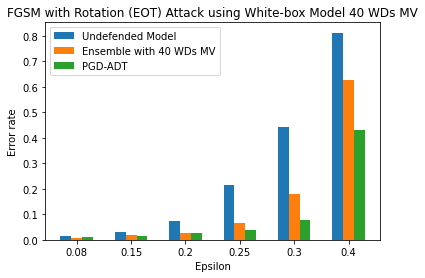

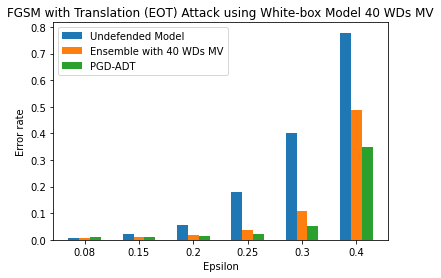

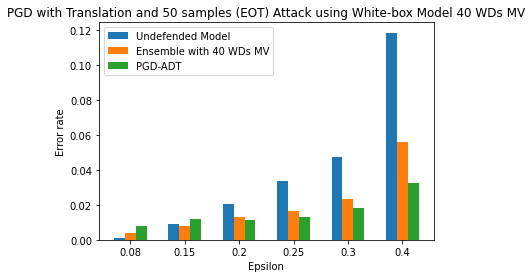

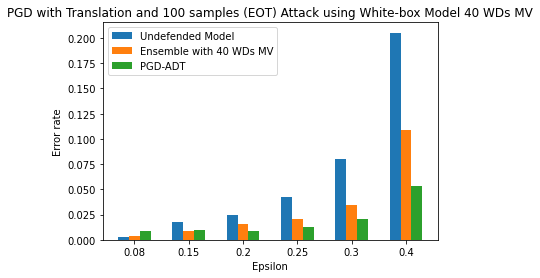

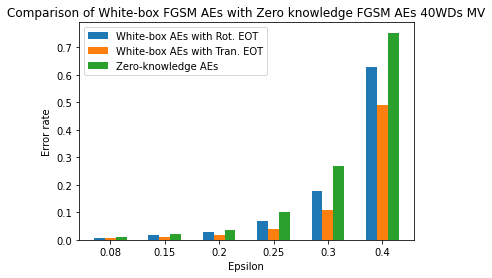

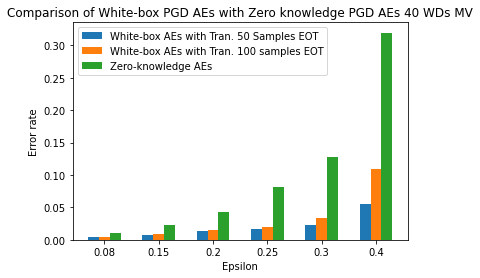

C:\Users\hezek\.conda\envs\athena\lib\site-packages\ipykernel_launcher.py:122: UserWarning: FixedFormatter should only be used together with FixedLocator


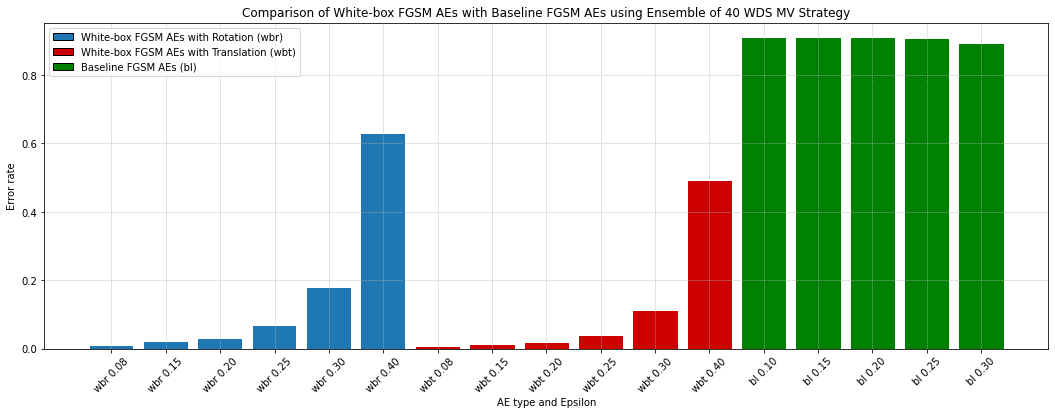

C:\Users\hezek\.conda\envs\athena\lib\site-packages\ipykernel_launcher.py:156: UserWarning: FixedFormatter should only be used together with FixedLocator


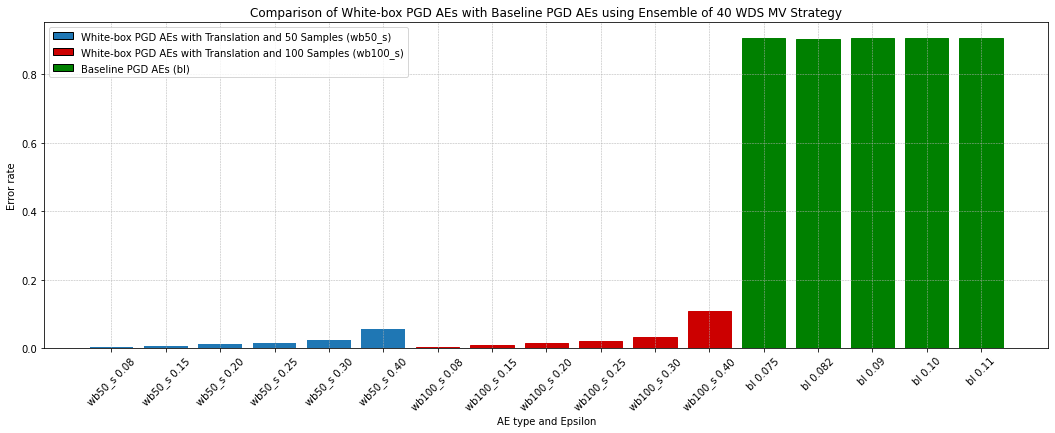

In [13]:
w = 0.2
x = [0.08, 0.15, 0.20, 0.25, 0.30, 0.40] #epsilon values for attack

# FGSM-White-box Attack with Rotation Setting in EOT
bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]
bar3 = [i+2*w for i in bar1]
plt.bar(bar1, FGSM_Task2_rot_40MV['UM'], w , label='Undefended Model')
plt.bar(bar2, FGSM_Task2_rot_40MV['Ensemble'], w , label='Ensemble with 40 WDs MV')
plt.bar(bar3, FGSM_Task2_rot_40MV['PGD-ADT'], w , label='PGD-ADT')

plt.xlabel('Epsilon')
plt.ylabel('Error rate')
plt.title('FGSM with Rotation (EOT) Attack using White-box Model 40 WDs MV')
plt.xticks(bar1+w, x)
plt.legend()
plt.show()

# FGSM-White-box Attack with Translation setting in EOT
bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]
bar3 = [i+2*w for i in bar1]
plt.bar(bar1, FGSM_Task2_tran_40MV['UM'], w , label='Undefended Model')
plt.bar(bar2, FGSM_Task2_tran_40MV['Ensemble'], w , label='Ensemble with 40 WDs MV')
plt.bar(bar3, FGSM_Task2_tran_40MV['PGD-ADT'], w , label='PGD-ADT')

plt.xlabel('Epsilon')
plt.ylabel('Error rate')
plt.title('FGSM with Translation (EOT) Attack using White-box Model 40 WDs MV')
plt.xticks(bar1+w, x)
plt.legend()
plt.show()

# PGD-White-box Attack with Translation and 50 num of samples setting in EOT
bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]
bar3 = [i+2*w for i in bar1]
plt.bar(bar1, PGD_Task2_Tran_50_40MV['UM'], w , label='Undefended Model')
plt.bar(bar2, PGD_Task2_Tran_50_40MV['Ensemble'], w , label='Ensemble with 40 WDs MV')
plt.bar(bar3, PGD_Task2_Tran_50_40MV['PGD-ADT'], w , label='PGD-ADT')

plt.xlabel('Epsilon')
plt.ylabel('Error rate')
plt.title('PGD with Translation and 50 samples (EOT) Attack using White-box Model 40 WDs MV')
plt.xticks(bar1+w, x)
plt.legend()
plt.show()

# PGD-White-box Attack with Translation and 100 num of samples setting in EOT
bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]
bar3 = [i+2*w for i in bar1]
plt.bar(bar1, PGD_Task2_Tran_100_40MV['UM'], w , label='Undefended Model')
plt.bar(bar2, PGD_Task2_Tran_100_40MV['Ensemble'], w , label='Ensemble with 40 WDs MV')
plt.bar(bar3, PGD_Task2_Tran_100_40MV['PGD-ADT'], w , label='PGD-ADT')

plt.xlabel('Epsilon')
plt.ylabel('Error rate')
plt.title('PGD with Translation and 100 samples (EOT) Attack using White-box Model 40 WDs MV')
plt.xticks(bar1+w, x)
plt.legend()
plt.show()

# FGSM-Comparison of White-box AEs with Zero-Knowledge AEs
bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]
bar3 = [i+2*w for i in bar1]
plt.bar(bar1, FGSM_Task2_rot_40MV['Ensemble'], w , label='White-box AEs with Rot. EOT')
plt.bar(bar2, FGSM_Task2_tran_40MV['Ensemble'], w , label='White-box AEs with Tran. EOT')
plt.bar(bar3, FGSM_Task1_40MV['Ensemble'], w , label='Zero-knowledge AEs')

plt.xlabel('Epsilon')
plt.ylabel('Error rate')
plt.title('Comparison of White-box FGSM AEs with Zero knowledge FGSM AEs 40WDs MV')
plt.xticks(bar1+w, x)
plt.legend()
plt.show()

# PGD-Comparison of White-box AEs with Zero-Knowledge AEs
bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]
bar3 = [i+2*w for i in bar1]
plt.bar(bar1, PGD_Task2_Tran_50_40MV['Ensemble'], w , label='White-box AEs with Tran. 50 Samples EOT')
plt.bar(bar2, PGD_Task2_Tran_100_40MV['Ensemble'], w , label='White-box AEs with Tran. 100 samples EOT')
plt.bar(bar3, PGD_Task1_40MV['Ensemble'], w , label='Zero-knowledge AEs')

plt.xlabel('Epsilon')
plt.ylabel('Error rate')
plt.title('Comparison of White-box PGD AEs with Zero knowledge PGD AEs 40 WDs MV')
plt.xticks(bar1+w, x)
plt.legend()
plt.show()

# w = 0.6
x_eps = ['wbr 0.08', 'wbr 0.15', 'wbr 0.20', 'wbr 0.25', 'wbr 0.30', 'wbr 0.40','wbt 0.08', 'wbt 0.15', 'wbt 0.20', 'wbt 0.25', 'wbt 0.30', 'wbt 0.40', 'bl 0.10', 'bl 0.15', 'bl 0.20', 'bl 0.25', 'bl 0.30']
new_data = {'Epsilon': x_eps, 'Error rate': FGSM_Task2_rot_40MV['Ensemble']+FGSM_Task2_tran_40MV['Ensemble']+FGSM_baseline_40MV['Ensemble']}

df = pd.DataFrame.from_dict(new_data)

legend_elements = [Patch(edgecolor='black',
                         label='White-box FGSM AEs with Rotation (wbr)'),Patch(facecolor='#CC0000',edgecolor='black',
                         label='White-box FGSM AEs with Translation (wbt)'), Patch(facecolor='green', edgecolor='black',
                         label='Baseline FGSM AEs (bl)')]

fig = plt.figure(figsize = (18, 6))
ax1 = plt.subplot(111)
ret = ax1.bar(df['Epsilon'], df['Error rate'])
ret[6].set_color('#CC0000')
ret[7].set_color('#CC0000')
ret[8].set_color('#CC0000')
ret[9].set_color('#CC0000')
ret[10].set_color('#CC0000')
ret[11].set_color('#CC0000')
ret[12].set_color('green')
ret[13].set_color('green')
ret[14].set_color('green')
ret[15].set_color('green')
ret[16].set_color('green')
ax1.xaxis.grid(linestyle= '--', linewidth=0.5)
ax1.yaxis.grid(linestyle= '--', linewidth=0.5)
ax1.legend(handles=legend_elements)
ax1.set_xticklabels(x_eps, rotation = 45)
ax1.set_xlabel('AE type and Epsilon')
ax1.set_ylabel('Error rate')
ax1.set_title('Comparison of White-box FGSM AEs with Baseline FGSM AEs using Ensemble of 40 WDS MV Strategy')
plt.show()

# PGD-Comparison of White-box AEs with Baseline AEs
x_eps = ['wb50_s 0.08', 'wb50_s 0.15', 'wb50_s 0.20', 'wb50_s 0.25', 'wb50_s 0.30', 'wb50_s 0.40','wb100_s 0.08', 'wb100_s 0.15', 'wb100_s 0.20', 'wb100_s 0.25', 'wb100_s 0.30', 'wb100_s 0.40', 'bl 0.075', 'bl 0.082', 'bl 0.09', 'bl 0.10', 'bl 0.11']
new_data = {'Epsilon': x_eps, 'Error rate': PGD_Task2_Tran_50_40MV['Ensemble']+PGD_Task2_Tran_100_40MV['Ensemble']+PGD_baseline_40MV['Ensemble']}

df = pd.DataFrame.from_dict(new_data)

legend_elements = [Patch(edgecolor='black',
                         label='White-box PGD AEs with Translation and 50 Samples (wb50_s)'),Patch(facecolor='#CC0000',edgecolor='black',
                         label='White-box PGD AEs with Translation and 100 Samples (wb100_s)'), Patch(facecolor='green', edgecolor='black',
                         label='Baseline PGD AEs (bl)')]

fig = plt.figure(figsize = (18, 6))
ax1 = plt.subplot(111)
ret = ax1.bar(df['Epsilon'], df['Error rate'])
ret[6].set_color('#CC0000')
ret[7].set_color('#CC0000')
ret[8].set_color('#CC0000')
ret[9].set_color('#CC0000')
ret[10].set_color('#CC0000')
ret[11].set_color('#CC0000')
ret[12].set_color('green')
ret[13].set_color('green')
ret[14].set_color('green')
ret[15].set_color('green')
ret[16].set_color('green')
ax1.xaxis.grid(linestyle= '--', linewidth=0.5)
ax1.yaxis.grid(linestyle= '--', linewidth=0.5)
ax1.legend(handles=legend_elements)
ax1.set_xticklabels(x_eps, rotation = 45)
ax1.set_xlabel('AE type and Epsilon')
ax1.set_ylabel('Error rate')
ax1.set_title('Comparison of White-box PGD AEs with Baseline PGD AEs using Ensemble of 40 WDS MV Strategy')
plt.show()